# A Step by Step Guide to Transfer Learning with Pytorch: Achieving High Accuracy on the CIFAR10 Dataset

## Prerequisites
* Python Programming at an intermediate level, especially good familiarity with Numpy and Pandas
* Some software development experience would be helpful but not strictly required. If you are a student with reasonable programming background, you will do just fine.
* Should have Anaconda for Python 3.x with Jupyter Notebook installed
* Preferably a commodity Nvidia GPU (GTX 1050 Ti, or a flavor of 1060,1070 or 1080 would do just fine. Of course if you have anything better it would only improve things) either locally or rented in Cloud. 
#### Warning: If you work with CPU only, it may take significantly more time (in order of days) to achieve the same results
* Previous knowledge of Pytorch or transfer learning is not required, but the reader should be familiar with basic concepts of Deep Learning and fundamentals of a Neural Network, as well as some basic terminology of Convolutional Neural Networks. Examples of such as fundamentals include Linear functions, Non-Linear transformations such as Rectified Linear Unit (ReLU) etc. back-propagation, gradients and gradient descent algorithm, loss-functions and how the weights of a Neural Network are updated. In terms of CNN, it would help to know how basic convolutions and pooling operations work.

We will cover the basics of Pytorch Tensors and Tensor operations and introduce all concepts related to Transfer Learning and Pytorch as we move along with the tutorial.

## Introduction to Pytorch
Pytorch is a relatively new Deep Learning framework from Facebook that is quickly gaining popularity in the research as well as the developer community. Its primary merits are flexibility and more control over the run-time behavior (sometimes called dynamic behavior) of a Neural Network. Another key advantage is its use of commonly used Python programming patterns and practices, unlike for example, Tensorflow which defines its own special kind of syntax and programming style on top of Python that makes it somewhat harder to learn for newcomers.

Pytorch 1.0 version has just been released as beta, at the time of this writing which is a major upgrade in terms of model deployment in the real-world. It introduces a Just-In-Time (JIT) graph compiler through a mechanism called Torch Script that makes it more efficient to deploy a model for prediction. 
However, in this tutorial we shall be using version 0.4.1 which is the last one before this major upgrade.

## Introduction to Transfer Learning
When we take a model created and trained elsewhere on a similar problem that we are trying to solve, and reuse its architecture and (possibly) its weights in our setting, we are applying Transfer Learning. It means that somebody trained a Neural Network model, on most likely a very large dataset, and put that pre-trained model in a model repository. We take that model and modify it a little bit to adapt it to our use case, thus transferring the learning achieved by that model previously to our application, without having to retrain it from scratch. This not only saves time but also transfers the ”knowledge” of the model to our case, which usually results in achieving very high accuracy. 

Essentially, we are building on other people’s work who make it available for the greater good. It’s a great step towards democratization of deep learning and Artificial Intelligence in general. Transfer learning is a highly effective technique used throughout the world by Deep Learning practitioners today. 

Transfer Learning is most effective when the use case is well-understood and the data is sort of ”fixed” so to speak, for example, image classification and object detection which are based on just pixels, or Natural Language Processing (NLP) text corpuses which are words out of a large vocabulary. 

It may not be that effective for structured or tabular data used in business settings e.g. data collected from databases and files because one company’s data may be quite different in structure and semantics from others. However, even that is changing now with recent trend in the use of categorical embeddings just like word embeddings used in NLP. Such embeddings allow us to transfer the learning achieved through data of one organization for a specific domain (e.g. predicting retail sales) to similar problems of others in the same domain.

## Our Problem Deifinition
In this tutorial, we provide a step-by-step guide to applying Transfer Learning in Pytorch on an image classification problem. The problem is to automatically classify objects present in images into categories e.g. bird, plane, dog, cat etc.

## Image Classification Use Cases
Image Classification is the basis and a core building block of several complex applications such as object detection, image captioning, face recognition and image segmentation to name a few. Features extracted from images during classification can be effectively used in several use cases and applications related to Computer Vision. 

## The Dataset
We will be using Cifar10 dataset. It is a dataset consisting of 60000 images categorized into 10 classes. Each image is of size 28x28. The images being small and somewhat blurry (low resolution) makes it one of the more difficult data-sets for classification. Some of the available benchmarks for this dataset are given at: <https://benchmarks.ai/cifar-10> 

There was a Kaggle competition on Cifar10 in 2014, whose results are also available at <https://www.kaggle.com/c/cifar-10>


## Objectives
At the end of this tutorial, the readers should be able to:
* Create an API (set of classes and utility functions) with Pytorch to preprocess and prepare any image dataset for training, evaluation and prediction
* Construct and use an API to effectively apply Transfer Learning in Pytorch on an image dataset for classification
* Acquire some tips and tricks to achieve very high accuracy on Cifar10 using three different, freely available pre-trained models by combining them effectively to achieve higher accuracy than the individual models. 
* Know how to create their own classes for Deep Learning tasks with Pytorch and use them as components in other applications

## State of the art results
While preparing this tutorial, my accuracy (94.7%) ended up on third place on both, the benchmark site as well as Kaggle scoring (of course through late submission). This was achieved in less than 2 hours of training altogether (all three models combined) on a commodity Nvidia GTX 1070 GPU. 

I will show you some simple tips and tricks to increase accuracy of your models with transfer learning and also how to ensemble different models together to achieve even higher accuracy in most applications.


## Outline of the Tutorial
This tutorial proceeds through the following steps:
    1. Create Pytorch Dataset for Cifar10
    2. Pre-process the Dataset and prepare it for training
    3. Create a Base Class for building a basic Neural Network
    4. Create a Fully Connected Class derived from the Base Class
    5. Create a Transfer Learning Class derived from the Base Class 
    6. Train two different pretrained, transferred models on Cifar10 dataset
    7. Evaluate and predict on test set with individual models and Ensemble
    8. Predict on Kaggle's given much larger Test set

### Code Comments
Code blocks and snippets have been explained using multiline comments on top of each block where I thought was necessary to explain something. Please pay attention to the code comments in "red". Previously explained pieces of code have been replaced by Ellipses (...) in subsequent code blocks for brevity.

### Link to code
The complete code is available on Git-Hub at: <>

In [1]:
import torch ## for pytorch
import torchvision ## for transfer learnhing models and many other vision related classes
from torch import nn ## Core Neural Network Model classes in Pytorch
from torch import optim ## Contains several Pytorch optimizer classes
import torch.nn.functional as F ## Contains several utilily functions provided by Pytorch

from torchvision import datasets, transforms, models ## Many Computer Vision related classes
                                                     ## for datasets and transformations etc.
from torch.utils.data import * ## Contains several utilily functions for dataset manipulation
from PIL import Image
import numpy as np


In [ ]:
## The following impports contain classes and functions that we develop throughout this tutorial. They have
## been explained throughout this tutorial.

from mylib.utils import *
from mylib.model import *
from mylib.cv_model import *
from mylib.fc import *
from mylib.chkpoint import *
from mylib.cv_data import *


## The following two lines are for reloading any imported files if they are modified while 
## our Jupyter Notebook is running
%load_ext autoreload 
%autoreload 2

# Step 1: Create a Pytorch Dataset for CIFAR 10
* We download the train and test datasets using CIFAR10 constructor available in datasets module in torchvision. 
* We pass train=True flag first to indicate that we want the training set. Then we pass it as False to download the test set
* We pass download=True since it is the first time we are constructing this dataset. Therefore, it will download first from a prespecified URL within the CIFAR10 class. 
* After running this cell first time and successfully downloading the datasets, you should change it to False to avoid downaloading every time.
* The result of the following operations would be two dataset objects representing the CIFAR10 training set and test sets respectively.


In [ ]:

train_dataset = datasets.CIFAR10('Cifar10', train=True,
                              download=True)

test_dataset = datasets.CIFAR10('Cifar10', train=False,
                             download=True)

This gives us two dataset objects which are of torchvision.datasets.cifar.CIFAR10 type. This is a sub-class of Pytorch' Dataset class which is the main class to generically represent any dataset. This particular class represents CIFAR10 data stored in its internal data structure. Later these objects shall be passed to a Pytorch Dataloader objects (explained later) for processing the images.

We can veify the lengths (number of images) of both datasets

In [3]:
len(train_dataset),len(test_dataset)

(50000, 10000)

As you can see above, we have 50000 and 10000 images in training and test sets respectively.

## A quick refresher of Tensors
Tensors are just a way of representing n-dimensional data objects of a single type (integers or float etc) in a generic way. for example:
* A single value (integer or float) is a 0-dimensional tensor
* An array with N elements is a one-dimentional tensor
* A matrix with M rows and N columns is a 2-dimensional tensor (MxN)
* An MxN image with three RGB (Red, Green Blue) color channels represented by three matrices is a three dimenional tensor (3 x M x N)


The image tensors are contained in the field train_data within the dataset object. Let's look at the shape of one of the tensors representing an image


In [5]:
train_dataset.train_data[0].shape

(32, 32, 3)

This tells us that our images are of 32 x 32 in size with 3 color channels.

Let's look at some of the images using matplotlib.plyplot module 

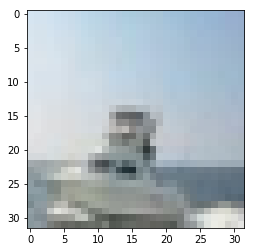

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(train_dataset.train_data[100])

This looks like a ship. As you can observe, the images are rather blurry and quite low resolution (32 x 32).

# Step 2: Pre-process the Dataset and prepare it for training
* Understand the concept of Data loader and the Pytorch Data loader API
* Split the images into train, validation and test sets
* Create Pytorch Dataloaders to feed images while training, validation and prediction
* Use Pytorch API to define Transforms for preprocessing the Dataset for more effective training
* Use Pytorch API to convert all images to Pytorch Tensors
* Normalize the dataset using mean and standard deviation of images


## Data Loaders
Pytorch Dataloaders are objects that act as Python generators. They supply data in chunks or batches while training and validation. We can instantiate Dataloader objects and pass our datasets to them. Dataloaders store the dataset objects internally. 

When the application asks for the next batch of data, a dataloader uses its stored dataset as a Python iterator to get the next element (row or image in our case) of data. Then it aggregates a batch worth of data and returns it to the application.

Following is an example of calling the Dataloader constructor:


In [4]:

num_train = len(train_dataset)
indices = list(range(num_train))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=50,sampler=SubsetRandomSampler(indices),
                                           num_workers=0)

In [5]:
len(train_loader)

1000

* [4] Here we are creating a Dataloader object for our training dataset with a batch size of 50. 
* The sampler parameter specifies the strategy with which we want to sample data while constructing batches.
* We have different samplers available in torch.utils.data.sampler. The explanation is straightforward. You can read about them in the Pytorch Documentation at https://pytorch.org/docs/stable/data.html#torch.utils.data.Sampler.

* The num_workers argument specifies how many processes (or cores) we want to use while loading our data. This provides parallelism while loading large datasets. Default is 0 which means load all data in main process.


Dataloader reports its length in number of batches. Since we created this Dataloader with a batch size of 50 and we had 50000 images in our train dataset, we have the length of dataloader = 1000 batches



### Splitting Data
Now let's write a function to split our datasets into train, validation and test sets and create their corresponding dataloaders

In [9]:
'''
This function takes the train and test data sets as arguments. 
Test Data can be None in which case it splits train data into 
three sets,train, test and validation.
If test_data is not none it just splits train set into 
train and validation and creates a separate dataloader 
from test set
'''

def split_image_data(train_data,
                     test_data=None,
                     batch_size=20,
                     num_workers=0,
                     valid_size=0.2,
                     sampler=SubsetRandomSampler):
    
    num_train = len(train_data)
    
    '''
    It creates a list of indices from the train set 
    using Python range function on its length
    '''
    indices = list(range(num_train))
    np.random.shuffle(indices)
    
    '''
    It splits the indices list according to the given
    validation set size (valid_size argument) whose
    default is 0.2 (20% of train data set aside for validation)
    '''
    split = int(np.floor(valid_size * num_train))
    train_idx, valid_idx = indices[split:], indices[:split]

    '''
    It uses RandomSubsetSampler constructor to shuffle the train 
    and validation set indices
    '''
    train_sampler = sampler(train_idx)
    valid_sampler = sampler(valid_idx)
    
    
    '''
    If a separate test set is given, it simply creates a Dataloader 
    from that set.
    
    If no test set is given, it further splits the train
    indices (which were obtained by splitting the original train_set 
    into train and validation indices earlier), into a set of train and
    test indices. Note that the test indices size is equal to the 
    validation set.
    
    This results in a new set of indices and a sampler 
    for test set from the train set.
    '''
    
    if test_data is not None:
        test_loader = DataLoader(test_data, batch_size=batch_size,
        num_workers=num_workers)
    else:
        train_idx, test_idx = train_idx[split:],train_idx[:split]
        train_sampler = sampler(train_idx)
        test_sampler = sampler(test_idx)
        
        test_loader = torch.utils.data.DataLoader(train_data, 
                                                  batch_size=batch_size,
                                                  sampler=test_sampler,
                                                  num_workers=num_workers)

    train_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size,
                                               sampler=train_sampler,
                                               num_workers=num_workers)
    
    valid_loader = torch.utils.data.DataLoader(train_data,
                                               batch_size=batch_size, 
                                               sampler=valid_sampler,
                                               num_workers=num_workers)
    
    return train_loader,valid_loader,test_loader

Let's call this function to obtain our Dataloaders

In [10]:

trainloader,validloader,testloader = split_image_data(train_dataset,test_dataset,batch_size=50)

len(trainloader),len(testloader),len(validloader)

(800, 200, 200)

And we have a nice split with 800 batches in our train set and 200 each in our validation and test sets respectively.

### Convolutional Neural Networks (CNN)
Although, we assume that you have a basic understanding of CNNs, if you want to refresh the core concepts, folowing are some great tutorials:
[Convolutional Neural Networks CS231n Stanford](http://cs231n.github.io/convolutional-networks/)

[CNN Tutorial: AnalyticsVidhya](https://www.analyticsvidhya.com/blog/2018/12/guide-convolutional-neural-network-cnn/)

[A Very Comprehensive Tutorial on ANN and CNN by Kaggle](https://www.kaggle.com/shivamb/a-very-comprehensive-tutorial-nn-cnn)

### Preprocessing and Transforming the Dataset
Before we move on to defining our Network and start training, we need to preprocess our datasets. Specifically, we need to perform the following steps:
* Resize the images to an appropriate size for our models
* Perform some basic and most common data augmentation
* Convert the image dat to Pytorch Tensors 
* Normalize the image data

###  Why do we want to Resize Images?
Most of our Transfer Learning models require data to be of at least 224x224 size. The reason for this limitation is that these models are designed with a large number of Convolution and pooling layers, finally followed by a fully connected (Linear) layer at the end to generate the classification output. By the time the input image reaches the final layer, it has been reduced drastically in size due to the way convolutions and pooling are defined. If the input image was already too small (like 32x32 CIFAR10 images in our case), it would be too small for the network to produce any significant output. Therefore, these models sort of restrict us to input an image >=224x224.

Please note that we wouldn't have needed resizing if our images were already > 224x224, like in case of ImageNet, or if we were to use our own CNN architecture which did not reduce the image size too much while passing it through layers. Resizing smaller images to larger ones (as in our case) creates artifacts that we don't (ideally) want our model to learn. Since our images are really small in case of CIFAR10 and the transfer learning models we are using have this requirement, we are obliged to resize.

In case of datasets with larger images, our GPU or CPU memory constraints may become a factor. Therefore, we combine downsizing with increased batch sizes (till we hit the batch size limit) to optimize the model performance and balance the effects of down-sizing.


### Data Augmentation
Data Augmentation is a common technique with Deep learning where we modify images on the fly while training to make the neural network see additional images flipped or rotated at different axes and angles. This usually results in better training performance since the Network sees multiple views of the same image and has a better chance of identifying its class when minimizing the loss function. 

Note that the augmented images are not added to the dataset, they are just created while generating batches, so the actual images seen during training would increase but you won't see the number of images in the datasets increasing. The length and other functions that count the number of images would still give the same answer.
We use two commonly used augmentations below: 
* RandomHorizontaFlip that flips some of the images around the vertical axis with a probability p that defaults to 0.5 meaning that  50% of the images shall be flipped
* RadomRotation at a specific degree (10 in our case below) that rotates some of them randomly at an angle of 10 degree again with a probability of p which defaults to 0.5

In [ ]:
from torchvision import transforms
train_transform = transforms.Compose([transforms.Resize(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                     ])

In [ ]:
train_dataset = datasets.CIFAR10('Cifar10',download=False,transform=train_transform)

### Data Normalization
In data normalization we statistically normalize the pixel values in our images. This mostly results in better training performance and faster convergence. A common way to perform normalization is to subract the mean of pixel values of the whole dataset from each pixel, and then divide by the standard deviation of the pixels of whole dataset.

* The most common way in Transfer learning is to use the mean and std values of the dataset the original Transfer Learning model was trained on. However, it may be a good strategy for cases where we don't want to retrain any part of the original model. 
* If our dataset is large and we want to retrain whole or part of the original model, then we would be **better off normalizing with the mean and standard deviation of the dataset in question (CIFAR10 in our case)**. However, in most transfer learning tutorials you'll find, the mean and std values for ImageNet are used.

Below, I give you two functions to calculate the mean and std of a dataset:

First one, "calculate_img_stats_avg" is based on Dataloader and calculates means and stds of each batch of data as it is retrieved from the dataset object, and finally takes the average of the accumulated means and std values. Although, this gives us an approximation of the actual values, it is reasonable to use for large datasets that won't fit into memory at the same time. This code has been adapted from [Pytorch forum](https://discuss.pytorch.org/t/about-normalization-using-pre-trained-vgg16-networks/23560/6?u=ptrblck)

The second function, "calculate_img_stats_full" calculates the actual mean and std of the whole dataset by working on it at once. This would give more accurate values, although, would most likely run out of memory for large datasets. For CIFAR10, this function requires 28GB of RAM. My machine has 32GB but it falls short and I am unable to run this function. This code has been adapted from the book "Deep Learning with Pytorch" by Eli Stevens and Luca Antiga, Manning Publications. 

You can try to run the second function on your specific dataset and if you run into memory issues, then fall-back to the first one for a good approximation. In case of CIFAR10 however, many people have calculated the mean and std of the dataset and the values are well known, like ImageNet. We are using those values in the code that follows. I did not try with the approximate values given by the first function but you are welcome to try with those.


In [ ]:
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor()])

dataset = datasets.CIFAR10('Cifar10',download=False,transform=transform)
loader = torch.utils.data.DataLoader(dataset, batch_size=50,num_workers=0)

* We first create a dataset from full data and then a dataloader to feed the data in batches of size 50 to 
our loop.
* Note that for Dataloader to work, the images have to be converted to a Tensor, so that is the only transform we are using.
* The function below is straight forward implementation that calculates mean and std of each batch and add them to their cumulative sums, dividing in the end by the total number of batches to get the averages

In [4]:
def calculate_img_stats_avg(loader):
    mean = 0.
    std = 0.
    nb_samples = 0.
    for imgs,_ in loader:
        batch_samples = imgs.size(0)
        imgs = imgs.view(batch_samples, imgs.size(1), -1)
        mean += imgs.mean(2).sum(0)
        std += imgs.std(2).sum(0)
        nb_samples += batch_samples

    mean /= nb_samples
    std /= nb_samples
    return mean,std

In [5]:
calculate_img_stats_avg(loader)

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2023, 0.1994, 0.2010]))

In [ ]:
def calculate_img_stats_full(dataset):
    imgs_ = torch.stack([img for img,_ in dataset],dim=3)
    imgs_ = imgs_.view(3,-1)
    imgs_mean = imgs_.mean(dim=1)
    imgs_std = imgs_.std(dim=1)
    return imgs_mean,imgs_std

In [ ]:
calculate_img_stats_full(dataset)

* torch.stack function above stacks the data along the given dimension (3 in our case). The view operation views the Tensor as a 3 x (product of all other dimensions) which basically flattens while keeping the first dimension to be 3

* The best way to visualize what is going on in an obscure kind of function as this one is to copy isolate the statements and feed them some dummy tensors to see what's going on. I leave it for you as an exercise.

Values below have been taken from the same book (referred above from which the code has been taken):

In [12]:
cifar10_mean = [0.4915, 0.4823, 0.4468]
cifar10_std  = [0.2470, 0.2435, 0.2616]

Now we can create our Datasets again from scratch with all the transformations, augmentations and normalization applied, splitting them into train and test and obtaining the final Dataloaders. **Note that we also define our batch size = 50**

In [13]:
batch_size = 50

'''
ToTensor() converts a numpy array (all our images are constructed as 
numpy arrays by the Dataset class when read from disk).

Normalize() is another transform that normalizes according to the passed 
values of Means and STD of each channel as separate lists or tuples.
'''
train_transform = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize(cifar10_mean, cifar10_std)
                                     ])

test_transform = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(cifar10_mean, cifar10_std)
                                    ])

train_data = datasets.CIFAR10('Cifar10', train=True,
                              download=False, transform=train_transform)
test_data = datasets.CIFAR10('Cifar10', train=False,
                             download=False, transform=test_transform)

trainloader,validloader,testloader = split_image_data(train_data,test_data,batch_size=batch_size)

len(trainloader),len(testloader),len(validloader)


(800, 200, 200)

### Data Augmentation is (mostly) applied to Train Set only
Note that we usually don't apply data augmentation to test set because we want the test data to remain as close to real data as possible, otherwise there's a chance that we may over-estimate performance. For example, our model may have mis-classified a test image but were correct for its flipped and rotated versions. This would increase the overall accuracy which would be misleading.

Having said that, there is a technique called [Test Time Augmentation (TTA)](https://towardsdatascience.com/test-time-augmentation-tta-and-how-to-perform-it-with-keras-4ac19b67fb4d) where we augment test data and average out the predictions after showing the trained model all the (augmented) variations of an image with the original one while testing. This may result in better accuracy sometimes. We are not going to use it in this tutorial but you can find out more in [this tutorial](https://www.kaggle.com/andrewkh/test-time-augmentation-tta-worth-it)

# Step 3: Create a Base Class for building a basic Neural Network

Now that we have our Dataloaders all prepared, we are ready to define our Neural Network and train it. In order to define a Neural Network, the best way is to define classes that isolate and abstract out functionality common to all types of Networks like training loops, validation, evaluation, prediction, setting different hyper-parameters etc. 

We also need to define classes that implement specific type of Networks e.g. specialized for Transfer Learning, or tailor-made for Fully Connected operation etc. Keeping this in mind, we will create three main classes:

* A Base Class representing a Neural Network derived from Pytorch's core nn.Module class 
which is the foundation of any Neural Network in Pytorch
* A class derived from our base class that implements functionality specific to Transfer Learning
* A class derived from our base class that implements functionality specific to Fully Connected Networks


**Let's build our base class called Network step by step**

In [ ]:
'''
 We inherit our class from nn.Module which is the core Pytorch class 
 for creating Neural Networks
'''
class Network(nn.Module):
    def __init__(self,device=None):
        '''
         We call the parent's constructor as we do in any 
         Python class derived from a parent class
        '''
        super().__init__()
        '''
        We set the device attribute to 'cuda' if it is available otherwise we set it to 'cpu'.
        This will help us avoid putting if else checks everywhere in the code regarding 
        CUDA availability. We can just move the tensors to whatever device is set on our object.
        '''
        if device is not None:
            self.device = device
        else:
            self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    '''
    We create a dummy forward method. Forward method is the core method in Pytorch that executes
    the Network graph and passes the inputs through the network transforming them and getting
    the output at the other end. 
    In Pytorch, we write our own forward method that executes the modules defined in the __init__ 
    method at run-time. 
    Since we will be writing the forward methods in derived classes, it is empty in the base class.
    '''
    def forward(self,x):
        pass

* **Note that forward method is called by nn.Module's "__ call __" method. So the object of our calss can become a "callable" and when it is called, the forward method shall be automatically invoked**. Please refer to any good Python tutorial if you want to know more about callables.


## Train Method
Next we add the train method. For training any Neural Network, there are a few common tasks that need to be performed in each iteration of the training loop. The following outline of the training loop is the logic of the inner part of the loop that performs actual training in each epoch. This part of the code goes through each batch. It basically defines a **single epoch** (single pass through the whole dataset):
* Get the next batch of data
* Move the Tensors of the batch to the device (GPU or CPU)
* Zero out the gradients of all weights 
* Call the forward function to send the inputs through the Network
* Pass the outputs obtained to the criterion (loss function) to compare them against the labels (targets) and calculate the loss
* Calculate the gradients
* update all the weights according to the gradients and the learning rate
* update the overall loss within this epoch.

If you are familiar with the basics of Neural Network, you must have recognized these steps since they are common to all frameworks and Neural Network types. Following code in train_ method performs these steps. Although, the code is pretty self-explanatory, a quick summary of Pytorch specific functions follows the code


In [ ]:
class Network(nn.Module):
    ...
    
    '''
    print_every indicates after how many batches we want to print the information about loss
    '''
    def train_(self,trainloader,criterion,optimizer,print_every):
        '''
        train method below (self.train()) is a built-in Pytorch method in the base class (nn.Module) 
        that sets a flag on the model object indicating that training is in progress. 
        This flag is used by several Pytorch modules that behave differently during training and 
        validation/testing e.g. Dropout, batch normalization etc.
        '''
        self.train()
        t0 = time.time()
        batches = 0
        running_loss = 0
        
        '''
        inputs and labels are one batch of images and their corresponding labels 
        from the trainloader
        '''
        for inputs, labels in trainloader:
            batches += 1
            #t1 = time.time()
            
            inputs, labels = inputs.to(self.device), labels.to(self.device)
            optimizer.zero_grad()
            outputs = self.forward(inputs)
            '''
            Criterion is basically the loss function that calculates the 
            difference between the output of the network and the actual labels.
            '''
            loss = criterion(outputs, labels)
            
            '''
            loss.backward() performs backpropagation, calculating the gradients
            througout the network following the complete graph of connected Tensors
            '''
            loss.backward()
            
            '''
            Optimizer.step performs one step of the optimizer algorithm after the loss function 
            has executed and the new gradients are available.
            '''
            
            optimizer.step()
            
            '''
            item() method gives a scalar value. It is used for Tensors 
            that return a single value (loss is a floating point numerical
            value in this case)
            '''
            loss = loss.item()
            
            #print('training this batch took {:.3f} seconds'.format(time.time() - t1))
            '''
            We keep a total running loss for this epoch
            '''
            running_loss += loss
            
            '''
            Print the loss information if the number of batches has reached print_every since
            the last print 
            '''
            if batches % print_every == 0:
                print(f"{time.asctime()}.."
                        f"Time Elapsed = {time.time()-t0:.3f}.."
                        f"Batch {batches+1}/{len(trainloader)}.. "
                        f"Average Training loss: {running_loss/(batches):.3f}.. "
                        f"Batch Training loss: {loss:.3f}.. "
                        )
                t0 = time.time()
        
        '''
        At the end we return the average loss of this epoch
        '''
        return running_loss/len(trainloader) 



#### Loss Functions
Note that Pytorch comes with many built-in loss functions for common cases like classification and regression etc. Here we are passing the loss function to train_ as an argument. Some common loss functions used in classification are CrossEntopy loss, Negative Likehood Log Loss (NLLLoss) and Binary-CrossEntropy). We will discuss more about loss function when we discuss the Fully Connected Class later in this tutorial.
#### Optimizer Module
Optimizer module applies gradient descent or its variant and performs weight updates with gradients and learning rates. Optimizers come in several flavors with different algorithms and are found in torch.optim module. Examples include Stocahstic Gradient Descent (SGD), Adam, AdaDelta etc.

## Validate Method
The task of the validate method is to apply the model to the validation set for evaluation. The purpose is to periodically assess how we are doing in terms of training. If you are familiar with Machine Learning concepts, you most likely know about bias (underfitting) and variance (overfitting). If our loss on validation set is **significantly and consistently** higher than the loss on training set, we are overfitting. This basically means our model won't generlize good enough on any other dataset because we are too tightly bound to the training set.

* The idea here is to evaluate the model on validation set after every few epochs (a good default is after every epoch), measure the loss and print it out to see if we are overfitting.

* The difference between validate method and train is that in validation we don't need to back-propagate, calculate the gradients, apply gradient descend and update the weights. All we need is to pass the validation data set batch by batch through our model and evaluate the loss using the loss function. 

* As our model gets better after some epochs, we should see our validation loss going down.

* One additional thing we also want to do in validation is to calculate the accuracy of our classification. This is simply the percentage of how many times we are correct in our prediction:
   100 x (number of correctly pedicted classes/dataset size)
* However, it would be better if we also calculate class-wise accuracy i.e. for each individual class we calculate how many of that class we got right verses the total number of images we have of that class.
* So we also write a utility function to calculate class-wise accuracies as shown below. This may come handy when we do predictions on our test set or any other set of images


In [ ]:
from collections import defaultdict

def update_classwise_accuracies(preds,labels,class_correct,class_totals):
    
    correct = np.squeeze(preds.eq(labels.data.view_as(preds)))
    
    '''
    We simply go through the batch (shape[0] is the batch size) and update 
    the classwise correct and total counts

    '''
    for i in range(labels.shape[0]):
        label = labels.data[i].item()
        class_correct[label] += correct[i].item()
        class_totals[label] += 1
        
class Network(nn.Module):
    ...
    
    def validate_(self,validloader):
        running_loss = 0.
        accuracy = 0
        
        '''
        We create two Python Default dictionaries to store classwise correct predictions 
        and total images per class
        '''
        class_correct = defaultdict(int)
        class_totals = defaultdict(int)
        
        '''
        self.eval() is a Pytorch method to put the model into evaluation mode. It tells Pytorch 
        we only want to perform forward pass through the network and no backpropagation.
        It is opposite to train method we had in our training loop
        '''
        self.eval()
        
        '''
        Whatever we put in torch.no_grad() block tells Pytorch not to compute gradients. 
        We want to make sure that gradients are never calculated within the evaluation loop.
        '''
        with torch.no_grad():
            for inputs, labels in validloader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.forward(inputs)
                loss = self.criterion(outputs, labels)
                running_loss += loss.item()
                _, preds = torch.max(torch.exp(outputs), 1) # you can safely remove the call to 
                                                            #torch.exp(as described below)
                    
                update_classwise_accuracies(preds,labels,class_correct,class_totals)
        
        '''
        We calculate the accuracy by the simple formula we discussed earlier.
        '''
        accuracy = (100*np.sum(list(class_correct.values()))/np.sum(list(class_totals.values())))
        
        '''
        We put the model back to train mode
        '''
        self.train()
        
        '''
        Running loss is total loss of all the batches. Dividing it by length of the trainloader 
        (number of batches) gives us average loss for the whole validation set
        '''
        return (running_loss/len(validloader),accuracy)
            


* **np.squeeze(preds.eq(labels.data.view_as(preds)))** 

 * This seems like a pretty obscure statement so let's break it down:
       * The actual labels are contained in our dataloader's data attribute.
       * Predictions are the output of our network
       * view_as method reorganizes a tensor according to the dimensions of the tensor passed as the argument. In our case this statement will align the labels in the batch with the predictions tensor i.e. batch_size x 10 since there are 10 classes of our network and our final Fully Connected layer would emit these many outputs for each batch. 
       * The eq method compares each row of a tensor and emits a 1 (True) where the rows are equal and 0 otherwise.
       * The final result would be a 50 x 1 Tensor which we flatten by squeezing out extra batch dimension to make it a 50-dimensional vector (1-dimensional tensor) containing either 1s (where predictions are equal to labels  or 0s where they are unequal.
   
* **_, preds = torch.max(torch.exp(outputs), 1)**
 * We will use Log of Softmax alog with Negative Log Likelihood Loss (NLLLoss) in our Fully Connected model (more on this later). Therefore, our outputs are expected to be log of probability values (also called Logits) . We don't strictly need to exponentiate the logits here as the max of the logits would still give us the same class index. We are doing it here just to make our predictions look like probabilities which sometimes helps in debugging. You are free to remove torch.exp call in the code if you want. torch.max returns a tuple containing the maximum value and the index of the maximum value within the tensor. Since the index in our case represents the classified category itself, so we only take that ignoring the actual probability.

## Evaluate Method
The purpose of evaluate method is to assess the performance of our model after training has completed on a test dataset. The assumption is that we have labels available for the dataset we want to pass to this method. 

The code is almost the same as validate. The only difference is that we don't have to calculate loss in this case since we are done with the training.

Since this method returns the overall accuracy as well as class-wise accuracies, we need another utility function get_accuracies. We also need class_names to get the actual names of the classes (if available). We will store the class names as a dictionary mapping ids (numbers) to class name strings when we create our Transfer Learning Model (later in this tutorial).


In [ ]:
from collections import defaultdict

def update_classwise_accuracies(preds,labels,class_correct,class_totals):
    correct = np.squeeze(preds.eq(labels.data.view_as(preds)))
    for i in range(labels.shape[0]):
        label = labels.data[i].item()
        class_correct[label] += correct[i].item()
        class_totals[label] += 1

def get_accuracies(class_names,class_correct,class_totals):
    
    accuracy = (100*np.sum(list(class_correct.values()))/np.sum(list(class_totals.values())))
    
    '''
    We get the class name and the accuracy of this class by dividing the correct 
    predictions of this calss by the total number of images of this class we have in the test dataset. 
    We put an extra condition that we have at least one image of a class to avoid dividing by 0
    '''
    class_accuracies = [(class_names[i],100.0*(class_correct[i]/class_totals[i])) 
                        for i in class_names.keys() if class_totals[i] > 0]
    return accuracy,class_accuracies

class Network(nn.Module):
    ...
    
    def evaluate(self,testloader):
        self.eval()
        self.model.to(self.device)
        class_correct = defaultdict(int)
        class_totals = defaultdict(int)
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(self.device), labels.to(self.device)
                outputs = self.forward(inputs)
                ps = torch.exp(outputs)
                _, preds = torch.max(ps, 1)
                update_classwise_accuracies(preds,labels,class_correct,class_totals)
                
        self.train()    
        return get_accuracies(self.class_names,class_correct,class_totals)
    

            

## Predict Method
The predict method is used to predict or draw inference from our trained model to determine the class of images for which we do not have labels. This is the method that would be called when the model is deployed in real life.

* It is very similar to evaluate except that there are no labels
* Another difference is that we are also interested in probabilities as well as predicted classes.
* We may also want to know the predicted probabilities of more than one classes e.g. top 3 most likely classes predicted along with their indices.

In [ ]:
class Network(nn.Module):
    ...
    
    '''
    Since we need probabilities and (possibly) multiple ranked classes, 
    we pass the topk argument that tells our function how many ranked
    classes with their probabilities we have to return.

    '''
     def predict(self,inputs,topk=1):
        self.eval()
        self.model.to(self.device)
        with torch.no_grad():
            inputs = inputs.to(self.device)
            outputs = self.forward(inputs)
            ps = torch.exp(outputs)
            p,top = ps.topk(topk, dim=1)
        return p,top

* The topk method of a tensor in Pytorch returns k indices and their values from a tensor along a dimension (dim=1 means along each row i.e. horizontally. Since our Tensor is 50 x number of classes, this would return the topk classes and their probabilities in each row).

## Fit Method
This is the main method that is called by the user of our class to kick off training. It implements the main training loop that implements the epoch loop. 

It calls train_ method, calls validation periodically to monitor performance and overfitting etc., keeps track of best accuracy achieved so far, saves the best accuracy model, saves full model alongwith its hyper-parameters and other variables to disk as a checkpoint.
Checkpoints can be restored and training continued later if power is lost or training is disrupted due to some reason.

Let's build this method step by step below:

In [ ]:

class Network(nn.Module):
    ...
    
    def fit(self,trainloader,validloader,epochs=2,print_every=10,validate_every=1):
            
        for epoch in range(epochs):
            '''
            We move the model to device ('gpu' or 'cpu')
            '''
            self.model.to(self.device)
            
            print('epoch {:3d}/{}'.format(epoch+1,epochs))
            
            epoch_train_loss =  self.train_(trainloader,self.criterion,
                                            self.optimizer,print_every)
            
            
            '''
            We check if we need to call validate after every validate_every epochs,
            call it and print out the validation loss and accuracy.
            '''
            if  validate_every and (epoch % validate_every == 0):
                t2 = time.time()
                epoch_validation_loss,epoch_accuracy = self.validate_(validloader)
                time_elapsed = time.time() - t2
                print(f"{time.asctime()}--Validation time {time_elapsed:.3f} seconds.."
                      f"Epoch {epoch+1}/{epochs}.. "
                      f"Epoch Training loss: {epoch_train_loss:.3f}.. "
                      f"Epoch validation loss: {epoch_validation_loss:.3f}.. "
                      f"validation accuracy: {epoch_accuracy:.3f}")
                    
                self.train()
                
                
    

## Saving the best accuracy model
The fit function should also monitor the best accuracy achieved so far across all epochs and save the best accuracy model as soon as it gets a new one better than the previous best. This ensure that even without checkpoints, we should be able to retrieve our best model if our validation loss starts to go down while training. 

This is a common scenario as training may take hours to complete and we may have to leave the system un-attended. This way we could ensure that we always re-load the best accuracy model's weights and use them for inference.

In [ ]:
from collections import defaultdict
import math

class Network(nn.Module):
    def __init__(self,device=None):
        ...
        
        '''
        we initialize the best_accuracy to 0. when we create the model instance
        '''
        self.best_accuracy = 0.

    ...
    
    def fit(self,trainloader,validloader,epochs=2,print_every=10,validate_every=1):
            
        for epoch in range(epochs):
            self.model.to(self.device)
            print('epoch {:3d}/{}'.format(epoch+1,epochs))
            epoch_train_loss =  self.train_(trainloader,self.criterion,
                                            self.optimizer,print_every)
                    
            if  validate_every and (epoch % validate_every == 0):
                t2 = time.time()
                epoch_validation_loss,epoch_accuracy = self.validate_(validloader)
                time_elapsed = time.time() - t2
                print(f"{time.asctime()}--Validation time {time_elapsed:.3f} seconds.."
                      f"Epoch {epoch+1}/{epochs}.. "
                      f"Epoch Training loss: {epoch_train_loss:.3f}.. "
                      f"Epoch validation loss: {epoch_validation_loss:.3f}.. "
                      f"validation accuracy: {epoch_accuracy:.3f}")
                
                
                '''
                We check and save the new best accuracy in the model if validate 
                returned a better accuracy.
                '''
                if self.best_accuracy == 0. or (epoch_accuracy > self.best_accuracy):
                    print('updating best accuracy: previous best = {:.3f} new best = {:.3f}'.format(self.best_accuracy,
                                                                                     epoch_accuracy))
                    self.best_accuracy = epoch_accuracy
                    
                    '''
                    Pytorch save method saves any Pytorch Tensor Data structure by serializing it with 
                    Python's Pickle Module. Here we are storing the model's state dictionary returned 
                    by state_dict() method that contains all the weights of the model's full graph 
                    (each tensor in the architecture).
                    '''
                    torch.save(self.state_dict(),self.best_accuracy_file)
                    
                self.train() # just in case we forgot to put the model back to train mode in validate
                
        print('loading best accuracy model')
        
        '''
        We restore the best accuracy model when we are done with the training loop. 
        This ensures that any evaluation or inference we perform while the model 
        remains in memory shall be done using the best accuracy model instead of 
        the one obtained in the last iteration of the training loop.
        '''
        self.load_state_dict(torch.load(self.best_accuracy_file))
                

* Note that the self.best_accuracy_file shall be the filename set during initialization of the model parameters (please see next)

## Setting and getting different parameters and hyper-parameters
We need to set different parameters and hyper-parameters of a model. These include loss function (criterion), optimizer, dropout probability, learning rate and some others.
We write four methods:
* set_criterion to create an instance of the loss function and set it on the model
* set_optimizer to create an instance of the optimizer and set it on the model
* set_model_params that calls the above two functions and sets additional hyper-parameters on the model object
* get_model_params that retrieves the currently set parameters on a model. This will come handy when we want to save a full model checkpoint.

In [ ]:

class Network(nn.Module):
    ...
    
    def set_criterion(self,criterion_name):
            if criterion_name.lower() == 'nllloss':
                self.criterion_name = 'NLLLoss'
                self.criterion = nn.NLLLoss()
            elif criterion_name.lower() == 'crossentropyloss':
                self.criterion_name = 'CrossEntropyLoss'
                self.criterion = nn.CrossEntropyLoss()

    def set_optimizer(self,params,optimizer_name='adam',lr=0.003):
        from torch import optim

        if optimizer_name.lower() == 'adam':
            print('setting optim Adam')
            self.optimizer = optim.Adam(params,lr=lr)
            self.optimizer_name = optimizer_name
        elif optimizer.lower() == 'sgd':
            print('setting optim SGD')
            self.optimizer = optim.SGD(params,lr=lr)

        elif optimizer.lower() == 'adadelta':
            print('setting optim Ada Delta')
            self.optimizer = optim.Adadelta(params)
            
    def set_model_params(self,
                         criterion_name,
                         optimizer_name,
                         lr, # learning rate
                         dropout_p,
                         model_name,
                         best_accuracy,
                         best_accuracy_file,
                         class_names):
        
        self.set_criterion(criterion_name)
        self.set_optimizer(self.parameters(),optimizer_name,lr=lr)
        self.lr = lr
        self.dropout_p = dropout_p
        self.model_name =  model_name
        self.best_accuracy = best_accuracy
        self.best_accuracy_file = best_accuracy_file
        self.class_names = class_names
    
    def get_model_params(self):
        params = {}
        params['device'] = self.device
        params['model_name'] = self.model_name
        params['optimizer_name'] = self.optimizer_name
        params['criterion_name'] = self.criterion_name
        params['lr'] = self.lr
        params['dropout_p'] = self.dropout_p
        params['best_accuracy'] = self.best_accuracy
        params['best_accuracy_file'] = self.best_accuracy_file
        params['class_names'] = self.class_names
        return params
    



* set_criterion supports two loss functions: CrossEntropy and NLLLoss. However, support for other loss functions can be trivially added by adding more if else statements.
* It is passed the name of the loss function and it instantiates an object using Pytorch API.
* set_optimizer similarly enables the optimizer by instantiating it using Pytorch API. It supports 'Adam' as default while SGD and Adadelta can be set. Again support for other optimizers can be easily added.
* set_model_params is a higher level method that calls set_criterion and set_optimizer as well as other parameters like model_name, current value of best accuracy, best_accuracy_file where we store the best accuracy, model weights, learning-rate and dropout probability. 
* We have omitted sanity checking for correctness of the types of parameters for brevity (e.g. model_name, optimizer_name should be strings and dropout_p, lr should be a float etc.).
* The set_model_param method shall be called from the main model classes e.g. Transfer Learning and Fully Connected models whose classes we shall next derive from this base Network class
* get_model_param simply returns the current parameters as a dicitonary. It will be used in creating the checkpoint (see next).
* class_names is a dictionary that contains a mapping of class identifiers (integers) to class names (strings) if such a mapping is available

## Saving a Model Checkpoint
* Saving a checkpoint of a model is an important task when training Deep Learning models. 
* This way we can comfortably execute long-running training loops
* If there is any disruption e.g. the machine crashes, power fails, Jupyter Notebpook crashes or any other unforeseen issue happens and our training is interrupted, we can restore from the last checkpoint and continue training. Our (potentially) hours of training shall not be lost.

* Now we will implement a method, save_checkpoint. 
* Later in this tutorial we will implement a utility function load_checkpoint when we have the derived classes from this base class for Fully Connected and Transfer Learning Models and we kow which type of model we need to instantiate (we will add that information to the store_chkpoint at that time)



In [ ]:


class Network(nn.Module):
    ...
    
    '''
    We add the chkpoint_file argument to the set_params function
    '''
    def set_model_params(self,
                         criterion_name,
                         optimizer_name,
                         lr, # learning rate
                         dropout_p,
                         model_name,
                         best_accuracy,
                         best_accuracy_file,
                         chkpoint_file):
        
        self.criterion_name = criterion_name
        self.set_criterion(criterion_name)
        self.optimizer_name = optimizer_name
        self.set_optimizer(self.parameters(),optimizer_name,lr=lr)
        self.lr = lr
        self.dropout_p = dropout_p
        self.model_name =  model_name
        self.best_accuracy = best_accuracy
        print('set_model_params: best accuracy = {:.3f}'.format(self.best_accuracy))  
        self.best_accuracy_file = best_accuracy_file
        self.chkpoint_file = chkpoint_file
    
    def get_model_params(self):
        params = {}
        params['device'] = self.device
        params['model_name'] = self.model_name
        params['optimizer_name'] = self.optimizer_name
        params['criterion_name'] = self.criterion_name
        params['lr'] = self.lr
        params['dropout_p'] = self.dropout_p
        params['best_accuracy'] = self.best_accuracy
        print('get_model_params: best accuracy = {:.3f}'.format(self.best_accuracy))  
        params['best_accuracy_file'] = self.best_accuracy_file
        params['chkpoint_file'] = self.chkpoint_file
        print('get_model_params: chkpoint file = {}'.format(self.chkpoint_file))  
        return params
    
    def save_chkpoint(self):
        saved_model = {}
        '''
        We retrieve all params via get_model_params and also the class names and 
        just dump them in the chkpoint file.
        '''
        saved_model['params'] = self.get_model_params()    
        torch.save(saved_model,self.chkpoint_file)
        print('checkpoint created successfully in {}'.format(self.chkpoint_file))


    

# Step 4: Create a Fully Connected Class derived from the Base Class

Now we are ready to create our first derived class for Fully Connected Neural Networks. Fully Connected Networks are traditionally called Multi-layer Perceptrons (MLP) in the literature. In most Deep Learning frameworks (including Pytorch) they are simply called Linear layers.

* In order to have a functional class for a Fully Connected Network, we will rely on Pytorch's nn.Linear Module. 

* nn.Linear module is itself derived from nn.Module from which we derived our own Network class.
* A Fully Connected Network consists of three basic pieces:
  * inputs 
  * Fully Connected hidden layers with each one followed by a non-linear transformation (let's consider the non-linearity as part of the hidden layer instead of treating it as a separate layer)
  
  * An output layer and the number of outputs
  
### Fully Connected Network Requirements
We need to meet the following requirements to create such a class:
 *  Ability to specify as many hidden layers as desired
 *  Ability to specify the number of inputs and outputs of the model
 *  Ability to define drop out and non-linearity ('relu', tanh etc.) for each layer
 *  Ability to define the output layer and prepare it for the classification task
 *  Set different parameters and hyper-parameters of the model like optimizer, loss function etc.
 
 Given these requirements, let's define a class for Fully Connected Model


In [ ]:
'''
Our new class FC is derived (inherited) from our base class Network and not nn.Module. 
So it gets all the methods available in base class for free
'''
class FC(Network):
    '''
    We pass the model parameters to init. We have already seen most of the parameters. 
    The additional ones are the num_inputs, num_outputs, non_linearity which is 
    defaulted to 'relu' and a list of hidden layer dimensions.
    '''
    def __init__(self,num_inputs,
                 num_outputs,
                 layers=[],
                 lr=0.003,
                 class_names=None,
                 optimizer_name='Adam',
                 dropout_p=0.2,
                 non_linearity='relu',
                 criterion_name='NLLLoss',
                 model_type='classifier',
                 best_accuracy=0.,
                 best_accuracy_file ='best_accuracy.pth',
                 chkpoint_file ='chkpoint_file.pth',
                 device=None):
        
        super().__init__(device=device)
        
        self.set_model_params(criterion_name,
                              optimizer_name,
                              lr,
                              dropout_p,
                              'FC',
                              best_accuracy,
                              best_accuracy_file,
                              chkpoint_file
                              )
        
        


* **num_inputs** is the total number of input features this Network is going to accept.
* **num_outputs** is the total number of outputs this Network is going to emit after passing throuhg any hidden layers. In other words this is the dimension of the output layer.
* **Non-linearity** is stored in the model as an attribute. Note that we do not pass the non-linearity to set_model_params as this is model specific and does not belong to the base class. 
* We may have to implement our versions of set_model_params and get_model_params methods later if we want to set and get additional parameters specific to the model. This is like implementing our own **"__ init __"** and then calling the parent's too. We do additional work in our code and then call the parent to do the common work.
* **layers** is a list specifying the number of units in each hidden layer. The order of numbers in this list would also specify their order in the model.

## Defining the Network using nn.Sequential
* **nn.Sequential** is a Pytorch method to create a simple sequential Neural Network that just concatenates the defined modules together as a sequence.
* At the time of execution, nn.Sequential automatically calls the forward methods of each module in the sequence.

Here we define an empty nn.Sequential first and then add the input module, hidden layers and output module to it

In [ ]:
class FC(Network):
    def __init__(self,num_inputs,
                 num_outputs,
                 layers=[],
                 lr=0.003,
                 class_names=None,
                 optimizer_name='Adam',
                 dropout_p=0.2,
                 non_linearity='relu',
                 criterion_name='NLLLoss',
                 model_type='classifier',
                 best_accuracy=0.,
                 best_accuracy_file ='best_accuracy.pth',
                 chkpoint_file ='chkpoint_file.pth',
                 device=None):
                              
        super().__init__(device=device)
        
        self.set_model_params(criterion_name,
                              optimizer_name,
                              lr,
                              dropout_p,
                              'FC',
                              best_accuracy,
                              best_accuracy_file,
                              chkpoint_file
                              )
        
        self.non_linearity = non_linearity
        
        '''
        We store the actual Network as a Sequential block in model attribute of our FC object
        '''
        self.model = nn.Sequential()
        
        
        '''
        We create groups of layers and add them to the Sequential model. 
        Each group consists of a linear layer followed by a non-linearity
        and dropout with probability passed as an argument.                                                         inplace=True))

        '''
        if len(layers) > 0:
            
            self.model.add_module('fc1',nn.Linear(num_inputs,layers[0]))
            self.model.add_module('relu1',nn.ReLU())
            self.model.add_module('dropout1',nn.Dropout(p=dropout_p,inplace=True))

            for i in range(1,len(layers)):
                self.model.add_module('fc'+str(i+1),nn.Linear(layers[i-1],layers[i]))
                self.model.add_module('relu'+str(i+1),nn.ReLU())
                self.model.add_module('dropout'+str(i+1),nn.Dropout(p=dropout_p,
           
            self.model.add_module('out',nn.Linear(layers[-1],num_outputs))
                                                                    
        else:
                                                                    
        '''
        If we don't have any hidden layer we just add one layer to our sequential model with number of 
        inputs and number of outputs. In this case we don't add any non-linearity or dropout since 
        non-Linearity is typically added in hidden layers.
        '''                                                            
            self.model.add_module('out',nn.Linear(num_inputs,num_outputs))
        

* **nn.Linear** is a Pytorch class that takes the number of inputs and the number of outputs and creates a Linear model with internal forward function.
* Note that we are naming our output layer as **'out'** and our hidden layers as **'fcX'** where X is the layer number (1, 2 ..)

## Loss functions for Classification
* We can broadly divide Linear Networks into two type: Regression and Classification.
* Although there are many loss functions used for classification, two most common ones which can be generlized easily from 2 to any number of classes are:
  * Negative Likehood Log Loss or NLLLoss
  * CrossEntropy Loss
  
### NLLLoss
* The NLLLoss function is very simple. It assumes that its input is a probability. It just takes the -ve of the log of its input for each input and adds them up. (more about it here: https://ljvmiranda921.github.io/notebook/2017/08/13/softmax-and-the-negative-log-likelihood/ )
* We need to convert the outputs to probabilities before feeding to the NLLLoss.
* The simplest way to do that is to take the Softmax of the inputs by taking the exponent of each input and dividing by the sum of the exponents (more info on the same link above). After this operation the outputs can be interpreted as probabilities (because they have been scaled or calibrated between 0 and 1), which are then fed to the NLLLoss, which outputs sum(-log(p)) where p is the output of each probability.
* However, in Pytorch the NLLLoss function expects that the log has already been calculated and it just puts a -ve sign and sums up the inputs. Therefore, we need to take the log ourselves after Softmax. There is a convenient function in Pytorch called LogSoftmax that does exactly that. So we will use it if our loss function is specified to be 'NLLLoss' by adding that after our output layer in the Sequential.

### Cross_entropy Loss
* If we were using Cross-Entropy loss we do nothing as the CrossEntropyLoss function will do what's required.



In [ ]:
class FC(Network):
    def __init__(self,num_inputs,
                 num_outputs,
                 layers=[],
                 lr=0.003,
                 class_names=None,
                 optimizer_name='Adam',
                 dropout_p=0.2,
                 non_linearity='relu',
                 criterion_name='NLLLoss',
                 model_type='classifier',
                 best_accuracy=0.,
                 best_accuracy_file ='best_accuracy.pth',
                 chkpoint_file ='chkpoint_file.pth',
                 device=None):
        
        super().__init__(device=device)
        
        self.set_model_params(criterion_name,
                              optimizer_name,
                              lr,
                              dropout_p,
                              'FC',
                              best_accuracy,
                              best_accuracy_file,
                              chkpoint_file
                              )
        
        self.non_linearity = non_linearity
        
        self.model = nn.Sequential()
        
        if len(layers) > 0:
            self.model.add_module('fc1',nn.Linear(num_inputs,layers[0]))
            self.model.add_module('relu1',nn.ReLU())
            self.model.add_module('dropout1',nn.Dropout(p=dropout_p,inplace=True))

            for i in range(1,len(layers)):
                self.model.add_module('fc'+str(i+1),nn.Linear(layers[i-1],layers[i]))
                self.model.add_module('relu'+str(i+1),nn.ReLU())
                self.model.add_module('dropout'+str(i+1),nn.Dropout(p=dropout_p,
                                                                    inplace=True))

            self.model.add_module('out',nn.Linear(layers[-1],num_outputs))
        else:
            self.model.add_module('out',nn.Linear(num_inputs,num_outputs))
        
        '''
        We use Logsoftmax if loss = NLLLoss
        '''
        if model_type.lower() == 'classifier' and criterion_name.lower() == 'nllloss':
            self.model.add_module('logsoftmax',nn.LogSoftmax(dim=1))
            
        '''
         We save the attributes of the model in our object for possible later reference.
        '''
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.layer_dims = layers
        
        '''
        We store the class names dictionary if passed, otherwise we create a simple dictionary
        with each class id converted to an string id e.g. 1 shall be converted to 
        '1' as class name.
        '''
        if class_names is not None:
            self.class_names = class_names
        else:
            self.class_names = {str(k):v for k,v in enumerate(list(range(num_outputs)))}
        

### Flattening the inputs
 * Before we could feed inputs to our FC Network, we need to flatten the input Tensor so that each row is just a one dimensional tensor and we have a batch of those rows. In other words the inputs have to be two dimensional (rows by columns) as most of you might be familiar with tabular data (from CSV files for example), used in Machine Learning. This is a requirement of the Linear Layer that it expects its data to be in batches of single dimensional tensors (vectors).

* To achieve this we simply have to change the view of our input tensors (if they are already in two dimensional nothing will change in the view).

* To do so we define a simple one-liner function as a utility. This makes the code much more readable as we immediately know that a flattening operation is going on instead of a rather cryptic .view statement.

In [ ]:
def flatten_tensor(x):
    return x.view(x.shape[0],-1)

class FC(Network):
    def __init__(self,num_inputs,
                 num_outputs,
                 layers=[],
                 lr=0.003,
                 class_names=None,
                 optimizer_name='Adam',
                 dropout_p=0.2,
                 non_linearity='relu',
                 criterion_name='NLLLoss',
                 model_type='classifier',
                 best_accuracy=0.,
                 best_accuracy_file ='best_accuracy.pth',
                 chkpoint_file ='chkpoint_file.pth',
                 device=None):
        
        
        super().__init__(device=device)
        
        self.set_model_params(criterion_name,
                              optimizer_name,
                              lr,
                              dropout_p,
                              'FC',
                              best_accuracy,
                              best_accuracy_file,
                              chkpoint_file
                              )
        
        
        self.non_linearity = non_linearity
        
        self.model = nn.Sequential()
        
        if len(layers) > 0:
            self.model.add_module('fc1',nn.Linear(num_inputs,layers[0]))
            self.model.add_module('relu1',nn.ReLU())
            self.model.add_module('dropout1',nn.Dropout(p=dropout_p,inplace=True))

            for i in range(1,len(layers)):
                self.model.add_module('fc'+str(i+1),nn.Linear(layers[i-1],layers[i]))
                self.model.add_module('relu'+str(i+1),nn.ReLU())
                self.model.add_module('dropout'+str(i+1),nn.Dropout(p=dropout_p,
                                                                    inplace=True))

            self.model.add_module('out',nn.Linear(layers[-1],num_outputs))
        else:
            self.model.add_module('out',nn.Linear(num_inputs,num_outputs))
        
        if model_type.lower() == 'classifier' and criterion_name.lower() == 'nllloss':
            self.model.add_module('logsoftmax',nn.LogSoftmax(dim=1))
        
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.layer_dims = layers
        
        if class_names is not None:
            self.class_names = class_names
        else:
            self.class_names = {str(k):v for k,v in enumerate(list(range(num_outputs)))}
    
    '''
    We define our forward function that basically calls the forward function of our model
    (nn.Sequential in this case) after flattening the inputs.
    '''
    def forward(self,x):
        return self.model(flatten_tensor(x))
        
        

## Setting and Getting Dropout
* We add two more convenience methods that give us the ability to change dropout probability any time we want.
* This might come in handy when we want to experiment quickly with different dropout probability values or may be change dropout dynamically while training based on some condition e.g. on detecting heavy overfitting.

In [ ]:

class FC(Network):
    ...
    '''
    Dropout layers in Pytorch are of type 'torch.nn.modules.dropout.Dropout'. 
    This can be checked for and acted upon accordingly for each such layer 
    in our sequential model.
    '''
    def _get_dropout(self):
        for layer in self.model:
            if type(layer) == torch.nn.modules.dropout.Dropout:
                return layer.p
            
    def _set_dropout(self,p=0.2):
        for layer in self.model:
            if type(layer) == torch.nn.modules.dropout.Dropout:
                print('FC: setting dropout prob to {:.3f}'.format(p))
                layer.p=p
        
        

* Here we are checking each layer for this type of module and if true we act accordingly in set and get methods.
* Note that the **torch.nn.modules.dropout.Dropout** has an attribute p where the dropout probability is stored


There are four additional attributes of our FC model we need to save in order to restore it correctly.
These are numb_inputs,num_outputs, layers and class_names. Since these are quite specific to FC model, we shuld write FC model's versions of get_model_param and set_model_param methods that internally call the base class ones and also perform any additional stuff.

So let's do that and complete our class before writing our restore_model function

In [ ]:
class FC(Network):
    ...
    
    def set_model_params(self,
                         criterion_name,
                         optimizer_name,
                         lr,
                         dropout_p,
                         model_name,
                         model_type,
                         best_accuracy,
                         best_accuracy_file,
                         chkpoint_file,
                         num_inputs,
                         num_outputs,
                         layers,
                         class_names):
        
        '''
        We call the parent class's set_model_params method passing it all its
        required arguments, and then add additional parameters to our 
        object as attributes.
        '''
        
        super(FC, self).set_model_params(criterion_name,
                              optimizer_name,
                              lr,
                              dropout_p,
                              model_name,
                              best_accuracy,
                              best_accuracy_file,
                              chkpoint_file
                              )
        
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.layer_dims = layers
        self.model_type = model_type
        
        if class_names is not None:
            self.class_names = class_names
        else:
            self.class_names = {k:str(v) for k,v in enumerate(list(range(num_outputs)))}
        
    def get_model_params(self):
        '''
        We call the parent class's get_model_params method and retrieve the dictionary 
        of params, then add our model specific attributes to the dictionary
        '''
        params = super(FC, self).get_model_params()
        params['num_inputs'] = self.num_inputs
        params['num_outputs'] = self.num_outputs
        params['layers'] = self.layer_dims
        params['model_type'] = self.model_type
        params['class_names'] = self.class_names
        params['device'] = self.device
        return params
        
        

### Loading a Saved Checkpoint
* Now let's create a load_chkpoint utility function which is given a checkpoint file to retrieve the model parameters and reconstruct the appropriate model. Since we have only one model type right now **(FC)**, we will put a check for that model_type only and later add support for Transfer Learning and any other classes as we create them.
* The code is pretty straight forward. It gets the params dictionary from the chkpoint_file and calls the appropriate constructor and finally loads the state dictionary of the best accuracy model from the filename of the best accuracy model retrieved from the chkpoint_file

In [ ]:
def load_chkpoint(chkpoint_file):
        
    restored_data = torch.load(chkpoint_file)

    params = restored_data['params']
    print('load_chkpoint: best accuracy = {:.3f}'.format(params['best_accuracy']))  
    
    if params['model_type'].lower() == 'classifier':
        net = FC( num_inputs=params['num_inputs'],
                  num_outputs=params['num_outputs'],
                  layers=params['layers'],
                  device=params['device'],
                  criterion_name = params['criterion_name'],
                  optimizer_name = params['optimizer_name'],
                  model_name = params['model_name'],
                  lr = params['lr'],
                  dropout_p = params['dropout_p'],
                  best_accuracy = params['best_accuracy'],
                  best_accuracy_file = params['best_accuracy_file'],
                  chkpoint_file = params['chkpoint_file'],
                  class_names =  params['class_names']
          )

    net.load_state_dict(torch.load(params['best_accuracy_file']))

    net.to(params['device'])
    
    return net
    
    
        
        

**This completes our FC class**. Now we should test it before proceeding further. Let's test it on **MNIST** dataset.

First we should calculate the MNIST dataset's **mean and std** values. They can be calculated without getting into any memory issues in a couple seconds with the function we created earlier for this purpose

In [10]:
train_data = datasets.MNIST(root='data',download=False,
                            transform = transforms.transforms.ToTensor())
mean_,std_= calculate_img_stats(train_data)
mean_,std_

(tensor([0.0839, 0.2038, 0.1042]), tensor([0.2537, 0.3659, 0.2798]))

* We create the transforms as before using the calculated mean and std values, and then apply them to our train and test sets, and then split our train set into train and validation. Remember that our split_image_data function just converts the test set into a dataloader if it is given as an argument.

In [18]:
train_transform = transforms.Compose([transforms.RandomHorizontalFlip(),
                                      transforms.RandomRotation(10),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.0839, 0.2038, 0.1042],[0.2537, 0.3659, 0.2798])
                                     ])

test_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize([0.0839, 0.2038, 0.1042],[0.2537, 0.3659, 0.2798])
                                    ])

In [19]:
train_dataset = datasets.MNIST(root='data',download=False,train=True, transform = train_transform)
test_dataset = datasets.MNIST(root='data',download=False,train=False,transform = test_transform)

In [20]:
trainloader,validloader,testloader = split_image_data(train_dataset,test_dataset,batch_size=50)
len(trainloader),len(validloader),len(testloader)


(960, 240, 200)

* We create an FC layer with number of inputs = 784 which is obtained after flattening the image dimensions (1 x 28 x 28) and number of outputs = 10 since we have 10 classes (digits 0 to 9)
* We arbitrarily select two hidden layer of 512 units each
* We set the optimizer to Ada Delta (more on it next)
* We set best accuracy and checkpoint files as appropriate


In [21]:
net =  FC(num_inputs=784,
          num_outputs=10,
          layers=[512,512],
          optimizer_name='Adadelta',
          best_accuracy_file ='best_accuracy_mnist_fc_test.pth',
          chkpoint_file ='chkpoint_file_mnist_fc_test.pth')

setting optim Ada Delta


## Optimizer choices
* Optimizer algorithms come in many variations and forms. Most of them try to optimize the basic gradient descent algorithm by varying the learning rate and other related parameters as they see the data.
* A full survey of optimizers is beyond the scope of this tutorial. See here for a detailed overview (http://ruder.io/optimizing-gradient-descent). 
* The main difference between most frequently used ones (adapted from the link above) are as follows:
  * **Batch Gragient Descend** is simplest and performs weight updates after looking at the entire dataset
  * **SGD** (Stochastic Gradient Descent) is on the other extreme and performs weight updates for each item (training example) in the dataset
  * **Mini-batch GD** is a variant of SGD and takes the best of both worlds. It updates weights after each mini-batch of data. In other words, pure SGD is mini-batch with a batch-size of 1. Anything in between 1 and the entire dataset, we call it Mini-batch GD
  * **Momentum** is a method that helps accelerate SGD in the relevant direction and attempts to dampen too many oscillations when trying to converge to a minimum
  * **Adagrad** adapts the learning rate to the parameters, and applies different learning rates for updating different parameters, based on the past history of the squares of the magnitude of gradients of each prameter. The main advantage of Adagrad is that the user does not have to tune the learning rate manually
  * **Adadelta** is an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. Instead of accumulating all past squared gradients, Adadelta restricts the window of accumulated past gradients to some fixed size "w"
  * **RMSprop** is an unpublished, adaptive learning rate method proposed by **Geoff Hinton** in Lecture 6e of his **Coursera** Class (http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf). RMSprop and Adadelta have both been developed independently around the same time stemming from the need to resolve Adagrad's radically diminishing learning rates
  * **Adaptive Moment Estimation (Adam)** is another method that computes adaptive learning rates for each parameter. In addition to storing an exponentially decaying average of past squared gradients like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients, similar to momentum

In my experimentation, **Adadelta** gives the highest accuracy on image datasets in general, much better than Adam and SGD, especially on Cifar10, although I admit I haven't tried Adadelta and RMSProp much. you should try these with your experiments to see if they make any difference.


Next we call our fit function passing it train and validation dataloaders and train for 5 epochs, printing every 300 batches each epoch while performing validaton every epoch (remember that default of validate_every = 1)

In [ ]:
net.fit(trainloader,validloader,epochs=5,print_every=300)

We get the following output (partial output shown for brevity)

**updating best accuracy: previous best = 95.883 new best = 95.992**

This shows that we got reasonable accuracy **(95.99)** in only **5** epochs. May be we can squeeze some more juice out of it by training for a few more epochs. 

So let' first test our save and load chkpoint functions and then continue training for another 10 epochs.


In [23]:
net.save_chkpoint()

get_model_params: best accuracy = 95.992
get_model_params: chkpoint file = chkpoint_file_mnist_fc_test.pth
checkpoint created successfully in chkpoint_file_mnist_fc_test.pth


We load the saved chkpoint into another variable to ensure that it is a new model.

In [24]:
net2 = load_chkpoint('chkpoint_file_mnist_fc_test.pth')

load_chkpoint: best accuracy = 95.992
setting optim Ada Delta


In [ ]:
net2.fit(trainloader,validloader,epochs=10,print_every=300)

**updating best accuracy: previous best = 96.392 new best = 96.875**

The best accuracy we could achieve on validation set after another 10 epochs is 96.875. Let's save and restore the model one more time before testing our evaluate method

In [26]:
net2.save_chkpoint()

get_model_params: best accuracy = 96.875
get_model_params: chkpoint file = chkpoint_file_mnist_fc_test.pth
checkpoint created successfully in chkpoint_file_mnist_fc_test.pth


In [27]:
net3 = load_chkpoint('chkpoint_file_mnist_fc_test.pth')

load_chkpoint: best accuracy = 96.875
setting optim Ada Delta


In [28]:
net3.evaluate(testloader)

(96.95,
 [('0', 98.87755102040816),
  ('1', 99.03083700440529),
  ('2', 96.70542635658916),
  ('3', 94.75247524752474),
  ('4', 97.35234215885947),
  ('5', 95.73991031390135),
  ('6', 96.4509394572025),
  ('7', 96.78988326848248),
  ('8', 97.1252566735113),
  ('9', 96.33300297324084)])

Let's also test our predict function next. To do that, we need to convert our testloader into a Python iterator, and then get the next batch from it using "next" method of the iterator. If you are not familiar with Python iterators, please see any good tutorial such as here (https://www.datacamp.com/community/tutorials/python-iterator-tutorial) for more information


In [29]:
iterator = iter(testloader)
imgs_,labels_ = next(iterator)

In [32]:
imgs_[0].shape,labels_[0].item()

(torch.Size([1, 28, 28]), 7)

We can see above that first image of our first batch is 1x28x28 while its label = 7
We can verify this by displaying the image using matplotlib's pyplot library after converting the image to numpy and removing the extra dimension to make it only 28 x 28 instead of 1 x 28 x 28

Note that to convert a Pytorch Tensor to numpy array, simply use .numpy() method available on Pytorch Tensor objects

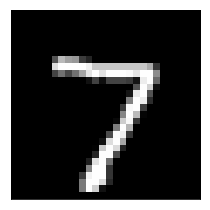

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
    
fig = plt.figure(figsize=(40,10))
ax = fig.add_subplot(2,10, 1, xticks=[], yticks=[])
ax.imshow(np.squeeze(imgs_[0].numpy()), cmap='gray')


Let's see if our model predicts the image correct

In [56]:
net3.predict(imgs_[0])[1].item()

7

* Ok so our evaluate and predict methods seem to be working fine, and we are able to score around **97%** on test set with all individual accuracies in the mid 90s. 
* This is pretty good given that we have only trained for **15** epochs for less than **3 minutes** and are using a simple fully connected network without any fancy **CNN** stuff
* Additionally, we have refactored our code into classes, utility functions and are also able to save and restore models as we require.

# Step 5: Create a Transfer Learning Class derived from the Base Class
Now we are ready to create our Transfer Learning class derived from our base **Network** class. Implementing **Transfer Learning** will turn out to be incredibly simple now with all the required machinery already in place. 

Transfer Learning class is based on torchvision.models module that contains support for  downloading and using several pretrained Network architectures for Computer Vision. We are going to add support for three models: 
  * Densenet121 which we simply call DenseNet
  * Resent34 and ResNet50 respectively

We have the option to use the pretrained versions of models (passing pretrained = True which is default anyway) where we obtain the architecture + weights, or just the architectures without weights and train them from scratch.

* Most of the pretrained versions available in torchvision.models have been trained on ImageNet with 1000 output classes
* We want to adapt the selected model to our use case. For example, for CIFAR10, we only need 10 classes, so our output should be set to 10 instead of 1000

* Each model can be considered as composed of two parts:
    * Convolution Backbone (a CNN architecture with several blocks comprising of convolutions with varying number of filters, non-linearities, max or average pooling layers, batch normalizations, dropout layers etc.)
    * A head with fully connected classifier at the output end
    
* In most cases, the output layer does not have any fully connected hidden layers 
* However, we have the option to replace the classifier layer with our own and add more hidden layers by replacing the output layer with our own. We may easily use our own FC class (defined earlier in this tutorial) for this purpose 
* On the other hand, we may choose to just change the number of outputs without adding any additional hidden layers
* Henceforth, we are going to use our own FC class and replace the original model's output layer with an FC object. This would give us the flexibility to pass any additional hidden layer if we want.

The code for our new class 'TransferNetworkImg' (derived from out base class 'Network') is quite simple. You just have to pay attention to two functions:
   * set_transfer_model which sets the Transfer model from torchvision.models
   * set_model_head which sets the FC layer on the model after removing the original classifier or fc layer.

### Setting the Classifier
* Note that the classifier at the head of each model is named differently in each torchvision model. Although, there are better ways to handle it, such as using a predefined dictionary in a file and loading it and looking up the classifier field for each model type to get the output layer's name

* However, in the following code, we are just using simple if else statements. You are welcome to create your own versions of this calss by creating such a dictionary if you want

* Setting the FC model is done in set_model_head. Since we need to call the FC constructor, we need to pass anything that is required to create our FC class object successfully. We are doing that by passing a dictionary called 'head' to our Transfer Learning Class

* To successfully create an FC model, we need to pass a fixed number of inputs to its constructor since it is a requirement of our nn.Linear layer used in FC Networks. Luckily, the nn.Linear class in Pytorch stores its number of inputs in an attribute called 'in_features'. We can grab that from the original classifier layer in the transferred model (Densenet, Resnet etc.) and pass it as argument to our FC constructor


### Freezing and un-freezing layers
* When using Transfer Learning models, it is important to decide whether we want to retrain all the layers (including Convolutions and Fully Connected) from scratch on our dataset. For reasonably large datasets such as CIFAR10, it makes sense to retrain the whole network.
* However, please note that retraining all layers does not mean we are going to start from random weights. We will still start with pretrained weights of each layer and continue from there, but we will be calculating the gradients for all layers and updating all weights. So in other words, the model starts learning while keeping the knowledge it gained for identifying images when it trained on the previous dataset (ImageNet in most cases).
* So its like a child that we trained on a specific thing and we don't want it to throw away all knowledge and continue when looking at new data.
* On the other hand, we may want to keep the weights frozen for the backbone while retraining on the head only. This is a common scenario when we have trained the network on new data for a while and now our backbone knows both ImageNet and our new dataset (CIFAR10 in our case).
* In the last case, we may want to do only predictions and want all weights including the backbone and the head to remain frozen. This is only good for prediction and evaluation though and not for training since there is no point in training if we don't want to do back propagation and update nothing.

We write a function to freeze weights while keeping the head unfrozen by default using the Pytorch Tensor's requires_grad flag. This flag is available in all Tensors and we want to set it True or False for weight Tensors (which could be obtained via parameters() method of any model derived from nn.Module)

### Adding support for Freeze and Unfreeze in our base class
We need to add support for Freeze and Unfreeze in our base class

In [ ]:
class Network(nn.Module):
   ...
'''
We have added two methods to freeze and unfreeze the parameters of all layers of our model
'''
    def freeze(self):
        for param in self.model.parameters():
            param.requires_grad = False
        
        
    def unfreeze(self):
        for param in self.model.parameters():
            param.requires_grad = True



## Transfer Learning Class

In [ ]:
from torchvision import models

In [ ]:
class TransferNetworkImg(Network):
    def __init__(self,
                 model_name='DenseNet',
                 lr=0.003,
                 criterion_name ='NLLLoss',
                 optimizer_name = 'Adam',
                 dropout_p=0.2,
                 pretrained=True,
                 device=None,
                 best_accuracy=0.,
                 best_accuracy_file ='best_accuracy.pth',
                 chkpoint_file ='chkpoint_file',
                 head={}):

        
        super().__init__(device=device)
        
        self.model_type = 'transfer'
        
        self.set_transfer_model(model_name,pretrained=pretrained)    
        
        if head is not None:
            self.set_model_head(model_name = model_name,
                                 head = head,
                                 optimizer_name = optimizer_name,
                                 criterion_name = criterion_name,
                                 lr = lr,
                                 dropout_p = dropout_p,
                                 device = device
                                )
            
        self.set_model_params(criterion_name,
                              optimizer_name,
                              lr,
                              dropout_p,
                              model_name,
                              best_accuracy,
                              best_accuracy_file,
                              chkpoint_file,
                              head)
            
    
    '''
    set_model_params calls the parent's method as before and sets 
    additional attributes specific to this class 
    (head and model_type set to 'transfer')
    '''
    def set_model_params(self,criterion_name,
                         optimizer_name,
                         lr,
                         dropout_p,
                         model_name,
                         best_accuracy,
                         best_accuracy_file,
                         chkpoint_file,
                         head):
        
        print('Transfer: best accuracy = {:.3f}'.format(best_accuracy))
        
        super(TransferNetworkImg, self).set_model_params(
                                              criterion_name,
                                              optimizer_name,
                                              lr,
                                              dropout_p,
                                              model_name,
                                              best_accuracy,
                                              best_accuracy_file,
                                              chkpoint_file
                                              )

        '''
        We also set the head end of our model to create FC layer
        when required
        '''
        self.head = head
        
        '''
        this time our model_type is transfer and not classifier
        '''
        self.model_type = 'transfer'
        

    def forward(self,x):
        return self.model(x)
        
    def get_model_params(self):
        params = super(TransferNetworkImg, self).get_model_params()
        params['head'] = self.head
        params['model_type'] = self.model_type
        params['device'] = self.device
        return params
    
    '''
    Freeze first freezes all paramters of our model by calling the base class's freeze() 
    method which we have added to the Network class (see below) and then unfreezes the 
    head's (classifier attribute) parameters based on the passed flag. 
    Note that we are calling our head as classifier. We would have to add more code if 
    we want to handle the case of regression as well in future. We have added two methods,
    freeze and unfreeze to our base class appropriately
    '''
    def freeze(self,train_classifier=True):
        super(TransferNetworkImg, self).freeze()
        if train_classifier:
            for param in self.model.classifier.parameters():
                param.requires_grad = True
            
                
    def set_transfer_model(self,mname,pretrained=True):   
        self.model = None
        if mname.lower() == 'densenet':
            self.model = models.densenet121(pretrained=pretrained)
            
        elif mname.lower() == 'resnet34':
            self.model = models.resnet34(pretrained=pretrained)
            
        elif mname.lower() == 'resnet50':
            self.model = models.resnet50(pretrained=pretrained)
              
        if self.model is not None:
            print('set_transfer_model: self.Model set to {}'.format(mname))
        else:
            print('set_transfer_model:Model {} not supported'.format(mname))
            
    
    '''
    set_model_head calls the FC constructors using the head dictionary. 
    It grabs the in_features from the appropriate attribute of the original
    model's classifier or fc layer. 
    
    We need to check if the model was saved and loaded from a checkpoint 
    because in the later case, the model's head-end object shall have 
    num_inputs attribute instead of the original in_features because 
    it would contain our FC object and that has num_inputs in 
    place of in_features.

    '''
    def set_model_head(self,
                        model_name = 'DenseNet',
                        head = {'num_inputs':128,
                                'num_outputs':10,
                                'layers':[],
                                'class_names':{}
                               },
                         optimizer_name = 'Adam',
                         criterion_name = 'NLLLoss',
                         lr = 0.003,
                         dropout_p = 0.2,
                         device = None):
        
        self.num_outputs = head['num_outputs']
        
        if model_name.lower() == 'densenet':
            if hasattr(self.model,'classifier'):
                in_features =  self.model.classifier.in_features
            else:
                in_features = self.model.classifier.num_inputs
                
            self.model.classifier = FC(num_inputs=in_features,
                                       num_outputs=head['num_outputs'],
                                       layers = head['layers'],
                                       class_names = head['class_names'],
                                       non_linearity = head['non_linearity'],
                                       model_type = head['model_type'],
                                       model_name = head['model_name'],
                                       dropout_p = dropout_p,
                                       optimizer_name = optimizer_name,
                                       lr = lr,
                                       criterion_name = criterion_name,
                                       device=device
                                      )
            
        elif model_name.lower() == 'resnet50' or model_name.lower() == 'resnet34':
            if hasattr(self.model,'fc'):
                in_features =  self.model.fc.in_features
            else:
                in_features = self.model.fc.num_inputs
                
            self.model.fc = FC(num_inputs=in_features,
                               num_outputs=head['num_outputs'],
                               layers = head['layers'],
                               class_names = head['class_names'],
                               non_linearity = head['non_linearity'],
                               model_type = head['model_type'],
                               model_name = head['model_name'],
                               dropout_p = dropout_p,
                               optimizer_name = optimizer_name,
                               lr = lr,
                               criterion_name = self.criterion_name,
                               device=device
                              )
         
        self.head = head
        
        print('{}: setting head: inputs: {} hidden:{} outputs: {}'.format(model_name,
                                                                   in_features,
                                                                   head['layers'],
                                                                   head['num_outputs']))
    
    def _get_dropout(self):
        if self.model_name.lower() == 'densenet':
            return self.model.classifier._get_dropout()
        
        elif self.model_name.lower() == 'resnet50' or self.model_name.lower() == 'resnet34':
            return self.model.fc._get_dropout()
        
            
    def _set_dropout(self,p=0.2):
        
        if self.model_name.lower() == 'densenet':
            if self.model.classifier is not None:
                print('DenseNet: setting head (FC) dropout prob to {:.3f}'.format(p))
                self.model.classifier._set_dropout(p=p)
                
        elif self.model_name.lower() == 'resnet50' or self.model_name.lower() == 'resnet34':
            if self.model.fc is not None:
                print('ResNet: setting head (FC) dropout prob to {:.3f}'.format(p))
                self.model.fc._set_dropout(p=p)
        

### Adding support for Transfer Learning Model to load_chkpoint utility
* We need to add the case for our TransferNetworkImg case in load_chkpoint function.
* The main addition is the storage and retrieval of head along with other params and also adding support for passing the retrieved head to the constructor



In [ ]:
def load_chkpoint(chkpoint_file):
        
    restored_data = torch.load(chkpoint_file)

    params = restored_data['params']
    print('load_chkpoint: best accuracy = {:.3f}'.format(params['best_accuracy']))  
    
    if params['model_type'].lower() == 'classifier':
        net = FC( num_inputs=params['num_inputs'],
                  num_outputs=params['num_outputs'],
                  layers=params['layers'],
                  device=params['device'],
                  criterion_name = params['criterion_name'],
                  optimizer_name = params['optimizer_name'],
                  model_name = params['model_name'],
                  lr = params['lr'],
                  dropout_p = params['dropout_p'],
                  best_accuracy = params['best_accuracy'],
                  best_accuracy_file = params['best_accuracy_file'],
                  chkpoint_file = params['chkpoint_file'],
                  class_names =  params['class_names']
          )
    elif params['model_type'].lower() == 'transfer':
        net = TransferNetworkImg(criterion_name = params['criterion_name'],
                                 optimizer_name = params['optimizer_name'],
                                 model_name = params['model_name'],
                                 lr = params['lr'],
                                 device=params['device'],
                                 dropout_p = params['dropout_p'],
                                 best_accuracy = params['best_accuracy'],
                                 best_accuracy_file = params['best_accuracy_file'],
                                 chkpoint_file = params['chkpoint_file'],
                                 head = params['head']
                               )
    
        


    net.load_state_dict(torch.load(params['best_accuracy_file']))

    net.to(params['device'])
    
    return net
    

# Step 6: Train two different pretrained, transferred models on Cifar10 dataset

Now we can move on to testing and experimentation. But before we can do that we should move our code to .py files and import it as modules. This makes it much more convenient and we don't have to rerun al lthe notebook cells after every time we reset the Python kernel of our notebook to empty the GPU memory for a fresh run.

I have created four files:
1. **model.py (contains the core Network class)**
2. **fc.py (contains the FC class)**
3. **cv_model.py (contains the TransferNetworkImg class)**
4. **utils.py (contains all the utility functions not belonging to any class)**

We create these files in a folder called mylib and import all of them. 

We also should use a special directive of our Jupyter notebook that makes it monitor and reload all the imported files in a cell that change on the disk. This would come in handy if wee modify any of the files for any reasn e.g. to fix a bug


In [ ]:
from mylib.utils import *
from mylib.model import *
from mylib.cv_model import *
from mylib.fc import *
from mylib.chkpoint import *

%load_ext autoreload
%autoreload 2

## Testing and Experimentation
In the following cells, we are going to perform the following steps in a sequence:

* Create our classes dictionary as well as the head dictionary to pass to the Transfer Learning object's constructor
* Create a Transfer Learning object for Densenet
* Unfreeze it
* Fit it to train for 3 epochs
* Save the check-point
* Load it back into another variable
* Unfreeze again and repeat with 3 more epochs
* Save the check-point again
* Reload into another variable
* Freeze this time and retrain for 3 more epochs
* Save the model again


In [6]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']
class_dict = {k:v for k,v in enumerate(classes)}

head={
       'num_outputs':10,
       'layers':[],
        'class_names':class_dict,
         'non_linearity':'relu',
         'model_type':'classifier',
         'model_name':'FC'
     }

In [ ]:
transfer_densenet = TransferNetworkImg(model_name='DenseNet',
                   optimizer_name = 'Adadelta',               
                   best_accuracy_file ='densenet_best_accuracy_cifar10.pth',
                   chkpoint_file ='densenet_cifar10_chkpoint_file',
                   head = head
                   )

In [23]:
transfer_densenet.unfreeze()

In [ ]:
transfer_densenet.fit(trainloader,validloader,epochs=3,print_every=200)

**updating best accuracy: previous best = 80.490 new best = 85.920**

In [25]:
transfer_densenet.save_chkpoint()

get_model_params: best accuracy = 85.920
get_model_params: chkpoint file = densenet_cifar10_chkpoint_file
checkpoint created successfully in densenet_cifar10_chkpoint_file


In [5]:
transfer_densenet2 = load_chkpoint('densenet_cifar10_chkpoint_file')

load_chkpoint: best accuracy = 85.920


/home/farhan/.conda/envs/dreamai/lib/python3.7/site-packages/torchvision-0.2.1-py3.7.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


set_transfer_model: self.Model set to DenseNet
setting optim Ada Delta
DenseNet: setting head: inputs: 1024 hidden:[] outputs: 10
Transfer: best accuracy = 85.920
setting optim Ada Delta


In [7]:
transfer_densenet2.unfreeze()

In [ ]:
transfer_densenet2.fit(trainloader,validloader,epochs=3,print_every=200)

In [9]:
transfer_densenet2.save_chkpoint()

get_model_params: best accuracy = 90.770
get_model_params: chkpoint file = densenet_cifar10_chkpoint_file
checkpoint created successfully in densenet_cifar10_chkpoint_file


**This time we have crossed 90% accuracy after unfreezing and training for another 3 epochs**

In [4]:
transfer_densenet3 = load_chkpoint('densenet_cifar10_chkpoint_file')

load_chkpoint: best accuracy = 90.770


/home/farhan/.conda/envs/dreamai/lib/python3.7/site-packages/torchvision-0.2.1-py3.7.egg/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.


set_transfer_model: self.Model set to DenseNet
setting optim Ada Delta
DenseNet: setting head: inputs: 1024 hidden:[] outputs: 10
Transfer: best accuracy = 90.770
setting optim Ada Delta


In [ ]:
transfer_densenet3.freeze()
transfer_densenet3.fit(trainloader,validloader,epochs=3,print_every=200)

**updating best accuracy: previous best = 94.940 new best = 95.080**

In [6]:
transfer_densenet3.save_chkpoint()

get_model_params: best accuracy = 95.080
get_model_params: chkpoint file = densenet_cifar10_chkpoint_file
checkpoint created successfully in densenet_cifar10_chkpoint_file


**So after 9 epochs, 6 with unfreeze and 3 with freeze, we are at 95.08%**

#### Let's repeat the same steps with Resnet34

In [7]:
transfer_resnet = TransferNetworkImg(model_name='ResNet34',
                   optimizer_name = 'Adadelta',               
                   best_accuracy_file ='resnet34_best_accuracy_cifar10.pth',
                   chkpoint_file ='resnet34_cifar10_chkpoint_file',
                   head = head
                   )

set_transfer_model: self.Model set to ResNet34
setting optim Ada Delta
ResNet34: setting head: inputs: 512 hidden:[] outputs: 10
Transfer: best accuracy = 0.000
setting optim Ada Delta


In [ ]:
transfer_resnet.unfreeze()
transfer_resnet.fit(trainloader,validloader,epochs=3,print_every=200)

**updating best accuracy: previous best = 82.700 new best = 86.040**

In [9]:
transfer_resnet.save_chkpoint()

get_model_params: best accuracy = 86.040
get_model_params: chkpoint file = resnet34_cifar10_chkpoint_file
checkpoint created successfully in resnet34_cifar10_chkpoint_file


In [5]:
transfer_resnet2 = load_chkpoint('resnet34_cifar10_chkpoint_file')

load_chkpoint: best accuracy = 86.040
set_transfer_model: self.Model set to ResNet34
setting optim Ada Delta
ResNet34: setting head: inputs: 512 hidden:[] outputs: 10
Transfer: best accuracy = 86.040
setting optim Ada Delta


In [ ]:
transfer_resnet2.unfreeze()
transfer_resnet2.fit(trainloader,validloader,epochs=3,print_every=200)

**updating best accuracy: previous best = 89.400 new best = 89.640**

In [7]:
transfer_resnet2.save_chkpoint()

get_model_params: best accuracy = 89.640
get_model_params: chkpoint file = resnet34_cifar10_chkpoint_file
checkpoint created successfully in resnet34_cifar10_chkpoint_file


In [4]:
transfer_resnet3 = load_chkpoint('resnet34_cifar10_chkpoint_file')

load_chkpoint: best accuracy = 89.640
set_transfer_model: self.Model set to ResNet34
setting optim Ada Delta
ResNet34: setting head: inputs: 512 hidden:[] outputs: 10
Transfer: best accuracy = 89.640
setting optim Ada Delta


In [ ]:
transfer_resnet3.freeze()
transfer_resnet3.fit(trainloader,validloader,epochs=3,print_every=200)

**updating best accuracy: previous best = 94.280 new best = 94.580**

In [6]:
transfer_resnet3.save_chkpoint()

get_model_params: best accuracy = 94.580
get_model_params: chkpoint file = resnet34_cifar10_chkpoint_file
checkpoint created successfully in resnet34_cifar10_chkpoint_file


# Step 7: Evaluate and predict on test set with individual models and Ensemble
We load both files for final Densenet and Resnet models and evaluate on the test set

In [ ]:
transfer_densenet = load_chkpoint('densenet_cifar10_chkpoint_file')

**Transfer: best accuracy = 95.08**

In [7]:
transfer_densenet.evaluate(testloader)

(93.0,
 [('airplane', 94.69999999999999),
  ('automobile', 96.5),
  ('bird', 90.4),
  ('cat', 84.5),
  ('deer', 94.3),
  ('dog', 89.5),
  ('frog', 94.5),
  ('horse', 94.69999999999999),
  ('ship', 94.5),
  ('truck', 96.39999999999999)])

In [ ]:
transfer_resnet = load_chkpoint('resnet34_cifar10_chkpoint_file')

**Transfer: best accuracy = 94.580**

In [10]:
transfer_resnet.evaluate(testloader)

(92.52,
 [('airplane', 94.5),
  ('automobile', 96.8),
  ('bird', 89.3),
  ('cat', 82.89999999999999),
  ('deer', 94.0),
  ('dog', 87.2),
  ('frog', 95.6),
  ('horse', 95.0),
  ('ship', 94.19999999999999),
  ('truck', 95.7)])

## Ensembling multiple models to improve accuracy
* We have tested and evaluated two different "transferred" models. Both models seem to perform almost equally well on this dataset. We might wonder what would happen if we somehow combine the results of both models to make our final prediciton. Combining two or more models together is called Ensemble learning. 

* You might have heard the term in case of traditional ML with Random Forests (RF) and Gradient Boosted Decision Trees (GBDT) as Ensemble models. Here we are talking about using two or more Deep Learning models to try to achieve better accuracy. For more information, please see [Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf)

* The intuition behind Ensembling is that one model might have mis-classified  a specific example while predicting but one or more of the others might have got it right. Our final prediction accuracy would likely improve if we somehow combine the predictions.

* One simple way to combine the predicitions is to give weights to each model's predictions based on some heuristic such as:
    1. Simple averaging of predicted values (e.g. probabilities) of different ensembles
    2. Assigning different weights to each member of an Ensemble based on its performance on the validation set
    3. Assign weights based on our experience with the model in general on multiple datasets. If one model performs better in majority of cases, we should give its prediction more weight.

* A generalized way to create an Ensemble could be to create an Emseble model class derived from our base Network class just like for Transfer-Learning and FC. 

* We don't need to have fit and train methods since the members of our Ensemble are expected to be pretrained outside the Ensemble itself. However, implementing the predict and evaluate methods in the Ensemble class makes sense. 

* We could pass the model objects to the Ensemble along with their weights while constructing it. In a highly desirable scenario, we would like an ML model of some sort to learn those weights themselves, but to keep things simpler (at least in this tutorial), we would pass weights by using some heuristic as discussed. 

* We could then write evaluate and predict methods such that they call each individual member's corresponding methods and multiply them by the model's given weight, and add the wieghted predictions to make the final one.

Below we show the relevant code of such a class. The code is quite simple and salient parts are explained for further clarity.

In [ ]:
class EnsembleModel(Network):
    '''
    The constructor expects a list of models and each member of list to be a tuple.
    First element of tuple must be the pretrained model object and the second the
    weight of the model.
    '''
    def __init__(self,models):
        self.criterion = None
        super().__init__()
        self.models = models
        '''
        The weights must sum to 1 so that our predictions are a weighted sum of
        the predictions of all models for each class.
        '''
        if sum(model[1] for model in models) != 1.0:
            raise ValueError('Weights of Ensemble must sum to 1')
            
        
    def evaluate(self,testloader,metric='accuracy'):
        from collections import defaultdict
        #evaluations = defaultdict(float)
        #num_classes = self.models[0][0].num_outputs
        class_correct = defaultdict(int)
        class_totals = defaultdict(int)

        class_names = self.models[0][0].class_names  
        with torch.no_grad():
            
            for inputs, labels in testloader:
                ps_list = []  
                '''
                 We go in a loop calling the forward method
                 of each model and multiply the predicted 
                 values by the model's weight.
                '''
                for model in self.models:
                    model[0].eval()
                    model[0].to(model[0].device)
                    inputs, labels = inputs.to(model[0].device), labels.to(model[0].device)
                    outputs = model[0].forward(inputs)
                    ps = torch.exp(outputs)
                    ps = ps * model[1] # multiply by model's weight
                    
                    '''
                    We build a list of the predicted probabilities and then go through
                    the list performing the sum of those values. 
                    Since the predictions had been already multiplied by weights in the
                    previous loop, we just need to sum now to get the final weighted sum. 
                    
                    The vector of weighted sum contains the ensembled predicted values
                    for each class. We can get the max of it just like we do for our 
                    regular models to get the final prediction for this image.
                    '''
                    ps_list.append(ps)
                    
                final_ps = ps_list[0]
                for i in range(1,len(ps_list)):
                    final_ps = final_ps + ps_list[i]
                _, final_preds = torch.max(final_ps, 1)
                #print(final_preds)
                update_classwise_accuracies(final_preds,labels,class_correct,class_totals)
        
       
        
        return get_accuracies(class_names,class_correct,class_totals)
                   
    '''
    Predict is very similar to the regular predict. Again the only difference
    is that we have the two loops and the final prediction is the 
    topk of the ensembled weighted sum of predictions.
    '''
    def predict(self,inputs,topk=1):
        ps_list = []  
        for model in self.models:
            model[0].eval()
            model[0].to(model[0].device)
            with torch.no_grad():
                inputs = inputs.to(model[0].device)
                outputs = model[0].forward(inputs)
                ps_list.append(torch.exp(outputs)*model[1])
       
        final_ps = ps_list[0]
        for i in range(1,len(ps_list)):
            final_ps = final_ps + ps_list[i]
        
        _,top = final_ps.topk(topk, dim=1)
            
        return top
    
    def forward(self,x):
        outputs = []
        for model in self.models:
             outputs.append(model[0].forward(x))
        return outputs
            


## Evaluating with Ensemble Models
* Let's create an Ensemble object and give 0.5 weight to both of ur models since they don't differ by much and observe the improvement in performance (if any)


In [9]:
ensemble = EnsembleModel([(transfer_densenet,0.5),(transfer_resnet,0.5)])
ensemble.evaluate(testloader)

(94.22,
 [('airplane', 95.6),
  ('automobile', 97.8),
  ('bird', 92.0),
  ('cat', 86.6),
  ('deer', 96.0),
  ('dog', 89.8),
  ('frog', 96.2),
  ('horse', 96.5),
  ('ship', 95.3),
  ('truck', 96.39999999999999)])

**So we go get a significant improvement by using the Ensemble.**

# Step 8:  Predict on Kaggle's given much larger Test set

The original CIFAR10 dataset has 60000 images, 50000 in the train set and 10000 in the test set. However, Kaggle has provided a huge dataset of 300000 images for testing of CIFAR10. Here is what Kaggle web-site has to say about these images:

"To discourage certain forms of cheating (such as hand labeling) we have added 290,000 junk images in the test set. These images are ignored in the scoring. We have also made trivial modifications to the official 10,000 test images to prevent looking them up by file hash. These modifications should not appreciably affect the scoring. You should predict labels for all 300,000 images."

Unzipping this test dataset once it has downloaded takes an enormous amount of time (several hours on my machine). 

## Creating our own custom Dataset for Kaggle test images
In order to handle this dataset, we have written our own custom dataset class derived from the base Dataset class of Pytorch. We then pass this dataset object to the Pytorch Dataloader. This makes it much convenient in handling this large dataset. It also gives us good practice in creating our own Dataset for images.

Below is the code for our own custom dataset class. The code is pretty straight forward. 
* A typical customer dataset contains an "__ init __" method, a "__ getitem__" method to convert it into an iterator and an "__ len __ " method to make the Python's len() function work on the dataset.

* Our custom dataset class assumes that information about the dataset image files is contained in a CSV file.
* The image ids are contained in column 0 of the file while image filename (path) is in column 1 and image's label (if available in the file) as a text e.g. bird, plane etc. is contained in column 2. 
* Our Kaggle test set has no labels since Kaggle uses it for scoring the competition and therefore, does not provide labels for test sets.
* We use Pandas Dataframe to handle the CSV file and then create the actual image set


In [7]:
import pandas as pd
from PIL import Image

class ImageDataset(Dataset):

    def __init__(self, csv_path,
                 transforms=None,
                 labels_=False):
       
        self.labels = None
        self.transforms = None

        '''
        We read the csv file in a Pandas DataFrame and extract image ids, image file-paths 
        and labels (if present) from its columns, assuming that they are contained in columns
        0, 1 and 2 respectively.
        '''
        self.df = pd.read_csv(csv_path)
        
        self.ids = np.asarray(self.df.iloc[:, 0])
        
        self.images = np.asarray(self.df.iloc[:, 1])
        
        if labels:
            self.labels = np.asarray(self.df.iloc[:, 1])
        
        '''
        We set the length of the dataset as well as a transform if passed
        '''
        self.data_len = len(self.df.index)
        if transforms is not None:
            self.transforms = transforms
            
        #print(self.data_len)

    '''
    In the __ getitem__ we have to read a single image from its file according to the index requested in. 
    Remember that this function shall be called by the Dataloader when creating a batch. It would call it
    for each ieration of batch consturction loop. We return the image and position index on each such call.
    '''
    def __getitem__(self, index):
        
        image_name = self.images[index]
        id_ = self.ids[index]
        img_ = Image.open(image_name)
        
        '''
        We apply transforms on each channel of the image. [:3,:,:] means all rows and columns
        of all three channels if any tranforms were given in the constructor.
        '''
        if self.transforms is not None:
            img_ = self.transforms(img_)[:3,:,:]
        
        '''
        Just to keep the API consistent and always return a two-valued tuple, we return 0 as label with
        each image even if there was no label. The assumption is that the caller of this method knows 
        if label is to be expected. 
        '''
        label = 0
        if self.labels is not None:
            label = self.labels[index]
        
        '''
        Our Dataset object is returning a three member tuple (id,image,label)
        '''
        return (id_,img_,label)

    def __len__(self):
        return self.data_len

## Extracting Meta-Data of the Test Set into a CSV file

* In order to use our Custom Dataset class with a Pytorch Dataloader, we need to create the csv file we want to pass to the Dataset constructor. 

* Kaggle hasn't really given usa csv file. All we have is a folder of images. To create the csv file we need to parse the image filenames and store the image names (ids) in first clumn and the path in the second column of our csv file. 

* Below is a function that uses  Python's glob module, with Pandas Dataframe and some Python string searching functions to create such a csv file. The code is quite straightforward so we won't describe it here for brevity.


In [ ]:
def create_csv_from_folder(folder_path,outfile,cols=['id','path']):
    
    f = glob.glob(folder_path+'/*.*')
    
    ids = []
    for elem in f:
        t = elem[elem.rfind('/')+1:]
        ids.append(t[:t.rfind('.')])
    data = {cols[0]:ids,cols[1]:f}    
    df = pd.DataFrame(data,columns=cols)
    df.to_csv(outfile,index=False)

* Using this function we can create our csv file, passing it the folder and the desired output csv filename as arguments. We have placed our test images from Kaggle in cifar10-test folder

In [ ]:
create_csv_from_folder('cifar10-test','cifar10-test.csv')

* We can test our code to see s sample of contents from the csv file

In [8]:
df = pd.read_csv('cifar10-test.csv')
df[:10]

,id,path
0,11798,cifar10-test/11798.png
1,298292,cifar10-test/298292.png
2,222281,cifar10-test/222281.png
3,165990,cifar10-test/165990.png
4,100937,cifar10-test/100937.png
5,197039,cifar10-test/197039.png
6,59773,cifar10-test/59773.png
7,52364,cifar10-test/52364.png
8,240916,cifar10-test/240916.png
9,244203,cifar10-test/244203.png


In [9]:
len(df.index)

300000

## Testing and preparing the submission file for Kaggle Test Set

Now all we need to do is create our custom Dataset and a Dataloader to perform evaluation on it using our models

In [15]:
test_transform_cifar10 = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(cifar10_mean,cifar10_std)
                                    ])

cifar10_test_dset = ImageDataset('cifar10-test.csv',transforms=test_transform_cifar10)
len(cifar10_test_dset)

300000

* As expected, the Dataset has 300000 images

In [17]:
cifar10_test_dset.df[:10]


,id,path
0,11798,cifar10-test/11798.png
1,298292,cifar10-test/298292.png
2,222281,cifar10-test/222281.png
3,165990,cifar10-test/165990.png
4,100937,cifar10-test/100937.png
5,197039,cifar10-test/197039.png
6,59773,cifar10-test/59773.png
7,52364,cifar10-test/52364.png
8,240916,cifar10-test/240916.png
9,244203,cifar10-test/244203.png


In [18]:
cifar10_test_testloader = DataLoader(cifar10_test_dset, batch_size=50,num_workers=0)

In [19]:
dataiter = iter(cifar10_test_testloader)
id_,images_,_ = dataiter.next()

In [20]:
images_.shape

torch.Size([50, 3, 224, 224])

* As expected, our Dataloader's one  batch has correct dimensions

To submit to Kaggle we need to create a csv file with image-id (name) in first column and label in the second (please see the competition web-page here to see the sample submission file).

The easiest way to do that is again to use Pandas DataFrame to prepare the results and the file.

Below we have the normal Dataloader loop:
  * We get the next batch of data. Remember that our Dataset object is returning a three member tuple (id,image,label). We are ignoring the label in this case since we are always returning 0
  * We first predict using our Ensemble, convert the predictions Tensor back to CPU, then convert it to numpy, flatten it using numpy's own flatten method available on numpy arrays, and finally convert to a simple Python list. This gives us the predicted classes for the whole batch
  * We keep collecting the predictions in our list and the corresponding labels in another list (using a lookup of image_ids into our class dictionary)
  * We finally create a Pandas DataFrame with two required columns and write it as a CSV file to disk. To match the exact required format, we set the index to False
  * Next we sort the values according to ids as the sample file shows us and rewrite the CSV file



In [ ]:
predictions = []
image_ids = []
for ids_,images_,_ in cifar10_test_testloader:
    preds_ = ensemble.predict(images_).cpu().numpy().flatten().tolist()
    predictions += [class_dict[pred] for pred in preds_]
    image_ids += ids_.numpy().flatten().tolist()

pd.DataFrame({'id':image_ids,'label':predictions}).to_csv('submission.csv',index=False)

In [ ]:
df = pd.read_csv('submission.csv')
df = df.sort_values('id')
df.to_csv('submission.csv',index=False)

## Conclusion

* When I submitted to Kaggle, these are the results I got:
    * 0.947 with an Ensemble of three models (I added support for another model, not shown in this tutorial)
    * 0.945 with an Ensemble of the two models discussed in this tutorial
    <img src="blog/image.png"> 
    * This would have taken me to 3rd place on Kaggle and also pretty high on the benchmarks published on several sites for CIFAR10.
    * It took me less than 75 mins to train all the models and create the Ensemble)
    * Of course if you play around and spend a bit more time I am sure you can beat the top benchmark
* During the course of trying to achieve high accuracy on CIFAR10, we created a resuable set of classes and utilily functions that could be used on any Image Classification task

### The key takeaways or a recipe for high accuracy are:
   * Use the mean and std of the image set itself instead of ImageNet to normalize if you have a large enough image set
   * Use an adaptive learning rate algorithm as optimizer. Adadelta worked best for me on CIFAR10 as well as flowers, and many other so far
   * Unfreeze and train for 3 to 5 epochs. Then save, reset the notebook, unfreese again and retrain for 3 to 5 epochs, then freeze and train for another 2 to 3 epochs, and you should be done
   * Experiment with additional FC layers and see if it makes any difference
   * Train multiple models, save them and use them as an Ensemble to make final predictions
   * Perhaps most importantly, consider applied Machine Learning as much of a Software Engineering discipline as a statistical and mathematical one. This means that most of the software engineering best practices still apply. Thinking about ML problems this way would lead you to **design good reusable components like classes and  utility functions to create your own API** even if you are given some code to start with. 
   * Refactor the code (if given to you) and put it inside your own classes and modify it accordingly to create clean interfaces and abstractions. This will save huge duplication of effort on other datasets and you may also be able to use your classes as components in other larger projects and tasks.